In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [99]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

In [100]:
survival = pd.read_csv('../../grenenet_cleaning/grenenet/SURVIVAL_total_flowers_collected.csv')

In [101]:
survival.columns

Index(['site', 'plot', 'comments', '1_flowerstotal', '1_survival',
       '1_comments', '2_flowerstotal', '2_survival', '2_comments',
       '3_flowerstotal', '3_survival', '3_comments', '4_flowerstotal',
       '4_surviva', '4_comments', '5_flowerstotal', '5_survival',
       '5_comments'],
      dtype='object')

In [102]:
survival = survival[['site', 'plot', '1_flowerstotal','2_flowerstotal','3_flowerstotal']]

In [103]:
survival['site_plot'] = survival['site'].astype(str) + '_' + survival['plot'].astype(str)

In [104]:
survival = survival[['site_plot', '1_flowerstotal','2_flowerstotal','3_flowerstotal']]

In [105]:
survival.columns = ['site_plot', 1, 2,3]

In [106]:
survival

site_plot      1      2     3
0         1_1  146.0  208.0  24.0
1         1_2  235.0  194.0   0.0
2         1_3  229.0  117.0   0.0
3         1_4  233.0  235.0  20.0
4         1_5  226.0  204.0  72.0
..        ...    ...    ...   ...
424      60_8   24.0    NaN   NaN
425      60_9    7.0    NaN   NaN
426     60_10   21.0    NaN   NaN
427     60_11   20.0    NaN   NaN
428     60_12   20.0    NaN   NaN

[429 rows x 4 columns]

In [9]:
#survival = survival.dropna(thresh=3) 

In [10]:
df = survival.set_index('site_plot')

In [11]:
#df = df.head(10)

In [12]:
# Drop rows with more than 1 NaN
df_cleaned = df.dropna(thresh=2)  # thresh=2 keeps rows with at least 2 non-NaN values

# Independent variable (generations)
x = np.array([1, 2, 3])

# Extract site information from the index (e.g., '1_1' -> '1')
df_cleaned['site'] = df_cleaned.index.str.split('_').str[0]

/tmp/ipykernel_756635/2735266357.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['site'] = df_cleaned.index.str.split('_').str[0]


In [13]:
# Group the DataFrame by 'site'
grouped = df_cleaned.groupby('site')

In [14]:
climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

In [15]:
climate['site'] = climate['site'].astype(str)

In [16]:
climate

site       bio1
0     1  10.743906
1    10  20.550923
2    11  13.801396
3    12  12.957162
4    13  20.412710
5    19  12.356965
6     2  15.594627
7    20  12.664749
8    21  11.534019
9    23   7.290877
10   24   6.008861
11   25  11.393515
12   26  21.603356
13   27   7.425145
14   28  16.868309
15    3   8.091410
16   30  11.802171
17   32  17.815169
18   33  12.198703
19   35  10.793042
20   37   8.130012
21    4  17.513474
22   41  10.983648
23   42  10.927050
24   43  18.000951
25   45  15.654286
26   46  11.277027
27   47  12.367914
28   48   8.506768
29   49  11.721280
30    5  14.996355
31   50   8.160572
32   51   9.167191
33   52  12.005284
34   53  12.362217
35   54  12.440169
36   55  11.564501
37   56   7.154544
38   57  12.276481
39   58   0.407027
40    6  14.989079
41   60  19.248051
42    7  10.394866
43    9  12.481669

In [17]:
df_cleaned['site'].nunique()

27

In [18]:
df_cleaned.merge(climate).sort_values('bio1')

1    2    3 site       bio1
127   0.0  0.0  NaN   24   6.008861
126  47.0  1.0  NaN   24   6.008861
123  94.0  0.0  NaN   24   6.008861
128  48.0  0.0  NaN   24   6.008861
129  11.0  7.0  NaN   24   6.008861
..    ...  ...  ...  ...        ...
76   30.0  5.0  0.0   10  20.550923
75   12.0  0.0  0.0   10  20.550923
74   21.0  1.0  0.0   10  20.550923
72   18.0  1.0  0.0   10  20.550923
79    1.0  4.0  0.0   10  20.550923

[330 rows x 5 columns]

In [33]:
n_sites = 27

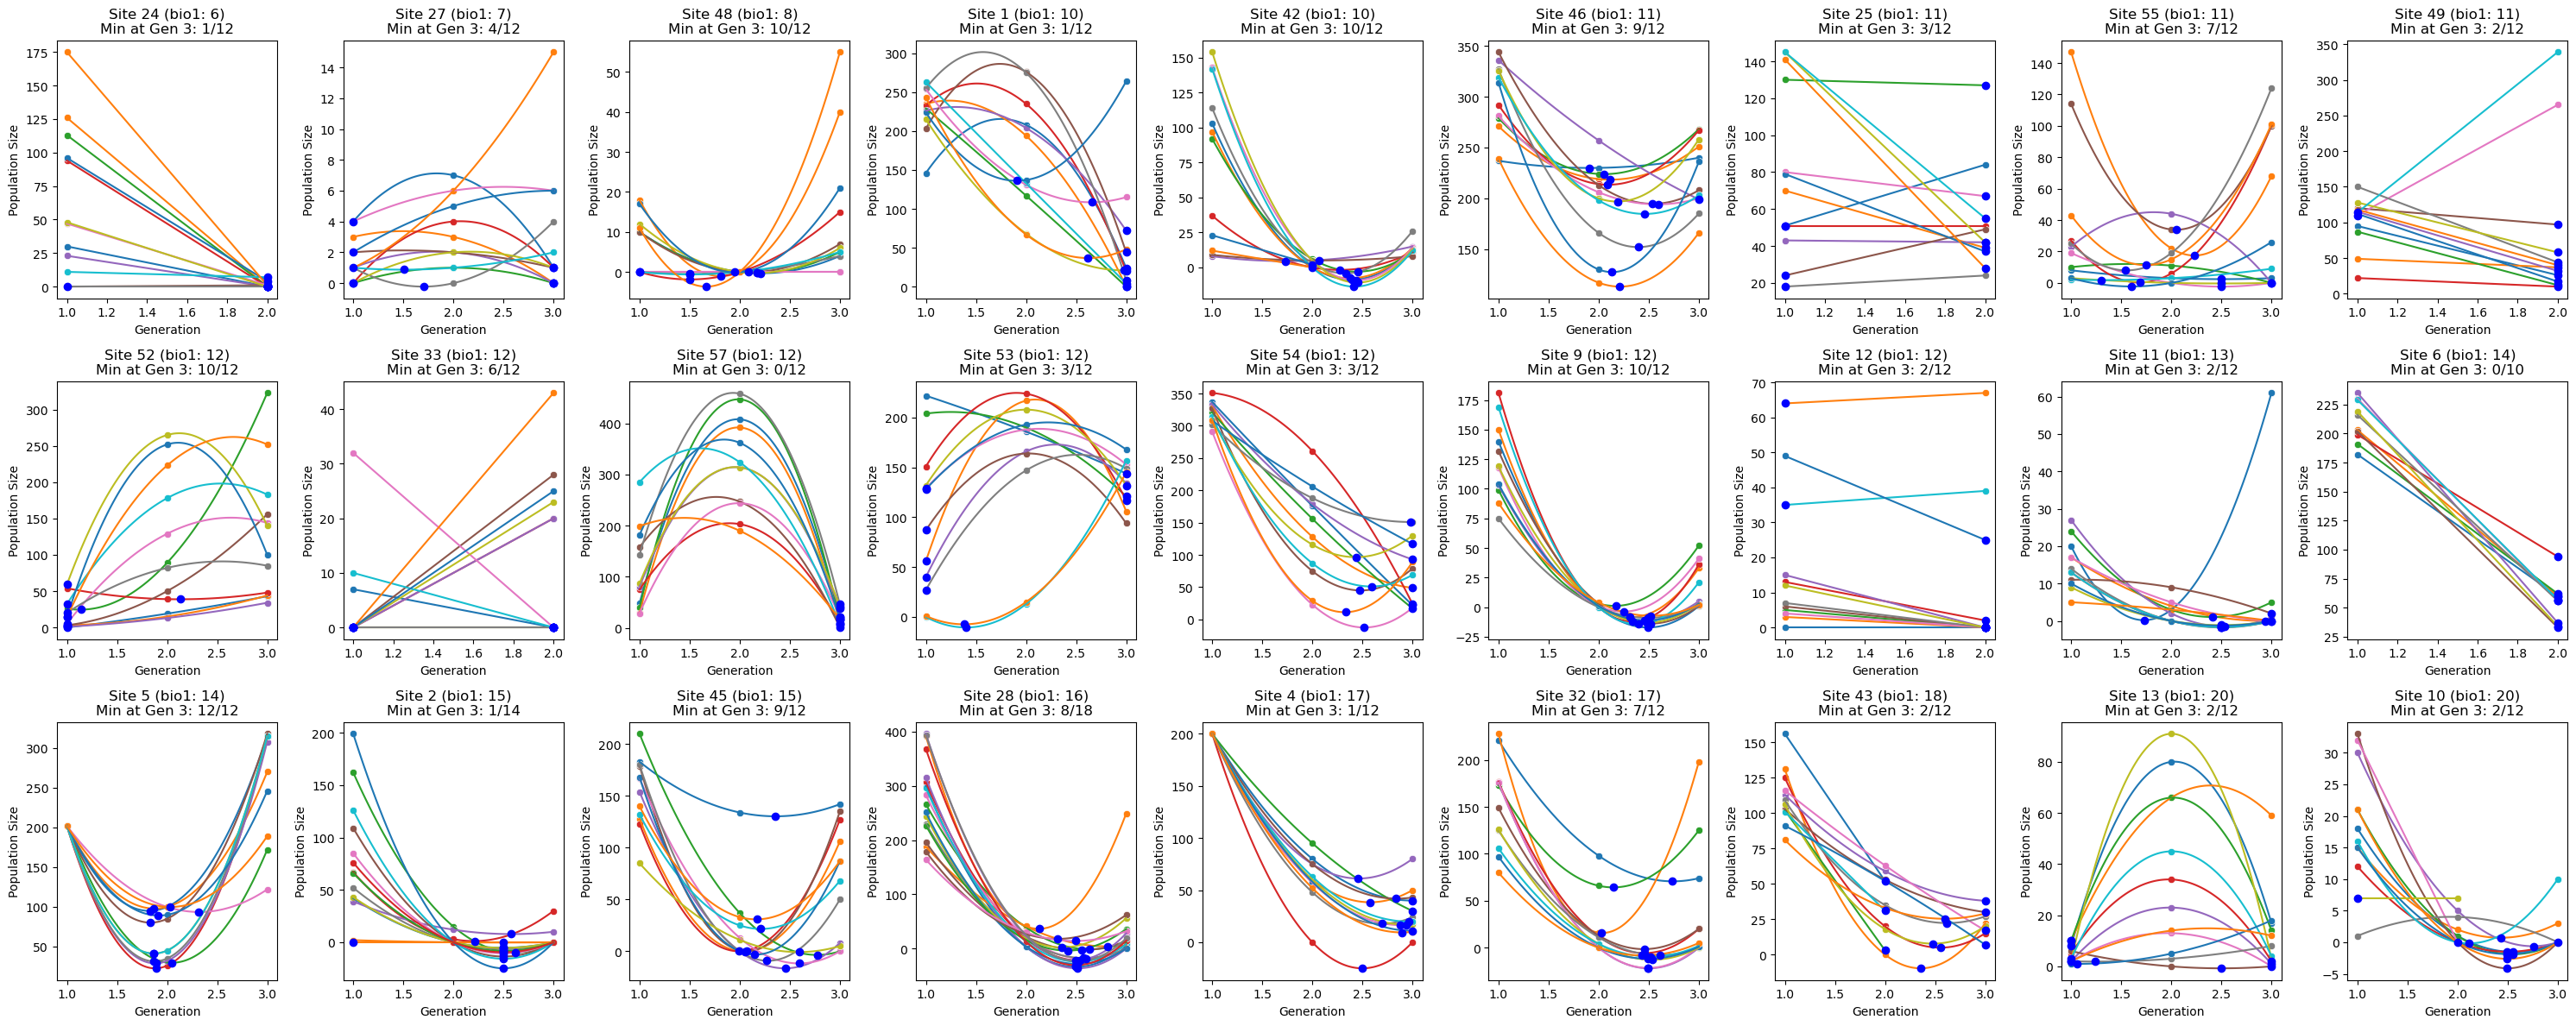

In [34]:
x_full = np.array([1, 2, 3])  # Generation values

grouped_sites_with_bio1 = pd.merge(df_cleaned[['site']], climate, on='site').drop_duplicates()

grouped_sites_with_bio1_sorted = grouped_sites_with_bio1.sort_values(by='bio1')

# Function to fit 2nd degree polynomial and find the minimum point
def fit_and_find_min(row):
    
    row = row[[1,2,3]].astype(float)
    valid_gen = row.dropna()  # Get non-NaN values
    x = x_full[:len(valid_gen)]  # Adjust x values based on number of generations

    if len(valid_gen) == 3:
        # Fit a 2nd-degree polynomial for 3 data points
        coefficients = np.polyfit(x, valid_gen, 2)
        poly_eqn = np.poly1d(coefficients)
    elif len(valid_gen) == 2:
        # Fit a 1st-degree polynomial for 2 data points
        coefficients = np.polyfit(x, valid_gen, 1)
        poly_eqn = np.poly1d(coefficients)
    else:
        raise ValueError("Not enough data points to fit a polynomial")

    # Generate fine-grained points to plot
    x_fine = np.linspace(min(x), max(x), 100)
    y_fine = poly_eqn(x_fine)

    # Find the minimum point for 2nd-degree polynomial (for linear, return end points)
    if len(valid_gen) == 3:
        min_index = np.argmin(y_fine)
        min_x = x_fine[min_index]
        min_y = y_fine[min_index]
    else:
        # Min for linear polynomial: check both ends
        if y_fine[0] < y_fine[-1]:
            min_x = x_fine[0]
            min_y = y_fine[0]
        else:
            min_x = x_fine[-1]
            min_y = y_fine[-1]

    return min_x, min_y, x_fine, y_fine

    return min_x, min_y, x_fine, y_fine
# Plotting each site in a subplot

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 3
n_cols = 9
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 12))  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]
    ax = axes[i] if n_sites > 1 else axes  # Handle single vs. multiple subplots
    count_er = 0

    for idx, row in group.iterrows():
        # Fit polynomial and find the minimum point
        min_x, min_y, x_fine, y_fine = fit_and_find_min(row)
        row = row[[1, 2, 3]].astype(float)
        x=x_full[:len(row.dropna())]
        row = row.dropna()
        # Plot original data points
        sns.scatterplot(x=x, y=row, legend=False, ax=ax)

        # Plot the fitted polynomial curve
        ax.plot(x_fine, y_fine)

        # Highlight the minimum point
        ax.scatter(min_x, min_y, color='blue', zorder=10)
        # Check if the minimum point is in the last generation (generation 3)
        if row.iloc[-2,] < row.iloc[-1,]:

            count_er += 1  # Increment the counter if min point is at generation 3

    # Store the count in the dictionary for this site
    site_min_in_last_gen[site] = count_er

    # Add labels and title for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})\nMin at Gen 3: {count_er}/{len(group)}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

plt.tight_layout()
plt.show()


In [22]:
import seaborn as sns

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [74]:
x_full = np.array([1, 2, 3])  # Generation values

grouped_sites_with_bio1 = pd.merge(df_cleaned[['site']], climate, on='site').drop_duplicates()

In [24]:


grouped_sites_with_bio1_sorted = grouped_sites_with_bio1.sort_values(by='bio1')

In [25]:
def fit_poly(group_long):

    # Prepare data
    x = group_long['Generation'].values.reshape(-1, 1)
    y = group_long['Population'].values
    # Step 1: Create polynomial features
    poly = PolynomialFeatures(degree=2)  # 2-degree polynomial
    x_poly = poly.fit_transform(x)  # Transform x into polynomial features
    
    # Step 2: Fit the model using LinearRegression (no ridge)
    model = LinearRegression()
    model.fit(x_poly, y)  # Fit the model
    
    # Step 3: Retrieve the coefficients and intercept
    intercept = model.intercept_  # This is the constant (c) term
    coefficients = model.coef_  # Coefficients for the polynomial terms
    # Step 4: Predict values for plotting
    x_fine = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    x_fine_poly = poly.transform(x_fine)  # Transform for polynomial features
    y_fine = model.predict(x_fine_poly)

    return model, x_fine, y_fine

def fit_lr(group_long):
    x = group_long['Generation'].values.reshape(-1, 1)
    y = group_long['Population'].values
    
    model = LinearRegression().fit(x, y)
    x_fine = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_fine = model.predict(x_fine)
    return model,x_fine, y_fine


In [26]:
colors = sns.color_palette('coolwarm', n_colors=27)

In [27]:
colors

[(0.2711042956470588, 0.3600106619764706, 0.8070951274352941),
 (0.31394635112941177, 0.4200516616941176, 0.8549925410352941),
 (0.3584149773647059, 0.47842617007058824, 0.8967946455764706),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.4517385604705882, 0.5881809882352941, 0.9602012675882352),
 (0.500030564517647, 0.6385084675764706, 0.9810701241058823),
 (0.5543118699137254, 0.6900970112156862, 0.9955155482352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6513978391568627, 0.7681214866470587, 0.9958911501294118),
 (0.6984540864549019, 0.7994498841137254, 0.9845774567019608),
 (0.743754202627451, 0.8251253648823529, 0.9657977615490196),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.8267843164705883, 0.8582053555372549, 0.906952644627451),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.9028486703176472, 0.8447956505882352, 0.8119698337411765),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9509556129803922, 0.7868750333333333, 0.7047606828039216),
 (0.9637718182823529, 0.7490855105725491, 0.6494200432901962),
 (0.9691920510470589, 0.705835675717647, 0.5937042609803921),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.9566532109764706, 0.598033822717647, 0.4773022923529412),
 (0.9392537715176471, 0.5395814885647059, 0.4239002049294118),
 (0.9151571239411764, 0.4769265271764706, 0.3721794147647059),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.848040402364706, 0.3382800379764708, 0.2752056394588237),
 (0.8057229630470588, 0.2598131362588235, 0.2305616574),
 (0.758112168364706, 0.1681215370352941, 0.18882707057647058)]

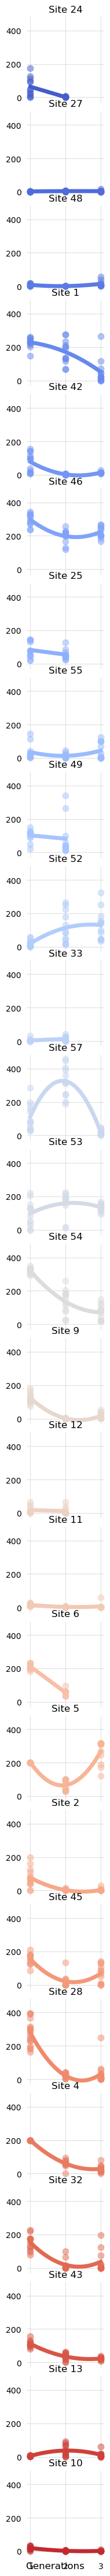

In [96]:
# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)

s_size=60
linewidth=5
alpha_scatter = 0.5
n_rows = 27
n_cols = 1
plt.rcParams['axes.axisbelow'] = True
fig, axes = plt.subplots(n_rows, n_cols, figsize=(2, 45), sharex=True, sharey=True)  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}
coeff_sites = {}
# Loop through each site to plot
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]

    # Reshape the data from wide to long format
    group_long = group.melt(var_name='Generation', value_name='Population', value_vars=[1, 2, 3], ignore_index=False)

    # Drop NaN values and ensure numeric types
    group_long = group_long.dropna()
    group_long['Generation'] = pd.to_numeric(group_long['Generation'])
    group_long['Population'] = pd.to_numeric(group_long['Population'])

    # Get the correct subplot
    ax = axes[i] if len(axes) > 1 else axes

    if group_long['Generation'].nunique() == 3:
        model, x_fine, y_fine = fit_poly(group_long)
        intercept = model.intercept_  # This is the constant (c) term
        coefficients = model.coef_  #
        coeff_sites[site] = [intercept, coefficients]
        if (coefficients[1]<0) & (coefficients[2] > 0):
            ## evolutioanry rescue 
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =alpha_scatter, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth)
            #ax.plot(x_fine, y_fine, color='black',linewidth=1.5)
        else:
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =alpha_scatter, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine,color=colors[i],linewidth=linewidth)

    elif group_long['Generation'].nunique() < 3:
        model, x_fine, y_fine = fit_lr(group_long)
        intercept = model.intercept_  # This is the constant (c) term
        coefficients = model.coef_  #
        coeff_sites[site] = [intercept, coefficients]
        if (coefficients[0] > 0):
            ## evolutioanry rescue 
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha = alpha_scatter, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth)
        else:
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax,color=colors[i], alpha = alpha_scatter, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i], linewidth=linewidth)


    # Remove spines (top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)  # Also remove the left spine if you want to clean up more
    ax.spines['bottom'].set_visible(False)  # Also remove the bottom spine for a cleaner look
        # Remove ticks for all subplots except the first one

    # Add title and labels for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('')
    ax.grid(True, color='lightgrey', alpha=0.7)
    ax.tick_params(axis='x', which='both',bottom=False)
    ax.tick_params(axis='y', which='both', left=False)
    ax.set_xlabel('')
fig.supxlabel('Generations')  # Set a common x-axis label for the entire figure

#plt.savefig('population_dynamics.png')
# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between subplots horizontally and vertically
#plt.savefig('pop_dynamics_all_equal.png')
#plt.savefig('pop_dynamics_all_equal.pdf')

In [81]:
order_paper = ['48', '27', '13', '2', '12', '28', '60', '11', '55', '25', '24',
       '52', '57', '53', '37', '26', '23', '10', '9', '1', '42', '45',
       '46', '6', '49', '54', '43', '4', '5', '32']

In [82]:
set(order_paper)

{'1',
 '10',
 '11',
 '12',
 '13',
 '2',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '32',
 '37',
 '4',
 '42',
 '43',
 '45',
 '46',
 '48',
 '49',
 '5',
 '52',
 '53',
 '54',
 '55',
 '57',
 '6',
 '60',
 '9'}

In [80]:
set(grouped_sites_with_bio1['site'].unique()).

{'1',
 '10',
 '11',
 '12',
 '13',
 '2',
 '24',
 '25',
 '27',
 '28',
 '32',
 '33',
 '4',
 '42',
 '43',
 '45',
 '46',
 '48',
 '49',
 '5',
 '52',
 '53',
 '54',
 '55',
 '57',
 '6',
 '9'}

In [72]:
grouped_sites_with_bio1['site'] = pd.Categorical(grouped_sites_with_bio1['site'], categories=order_paper, ordered=True)

In [73]:
grouped_sites_with_bio1

site       bio1
0      1  10.743906
12     2  15.594627
26     4  17.513474
38     5  14.996355
50   NaN  14.989079
60     9  12.481669
72    10  20.550923
84    11  13.801396
96   NaN  12.957162
108   13  20.412710
120  NaN   6.008861
132  NaN  11.393515
144   27   7.425145
156   28  16.868309
174   32  17.815169
186  NaN  12.198703
198   42  10.927050
210   43  18.000951
222   45  15.654286
234   46  11.277027
246   48   8.506768
258  NaN  11.721280
270   52  12.005284
282   53  12.362217
294   54  12.440169
306   55  11.564501
318  NaN  12.276481

In [57]:
len(grouped_sites_with_bio1_sorted)

27

In [86]:
df_cleaned['site']

site_plot
1_1       1
1_2       1
1_3       1
1_4       1
1_5       1
         ..
57_12    57
57_13    57
57_15    57
57_16    57
57_18    57
Name: site, Length: 330, dtype: object

48
27
13
2
12
28
11
55
25
24
52
57
53
10
9
1
42
45
46
6
49
54
43
4


IndexError: list index out of range

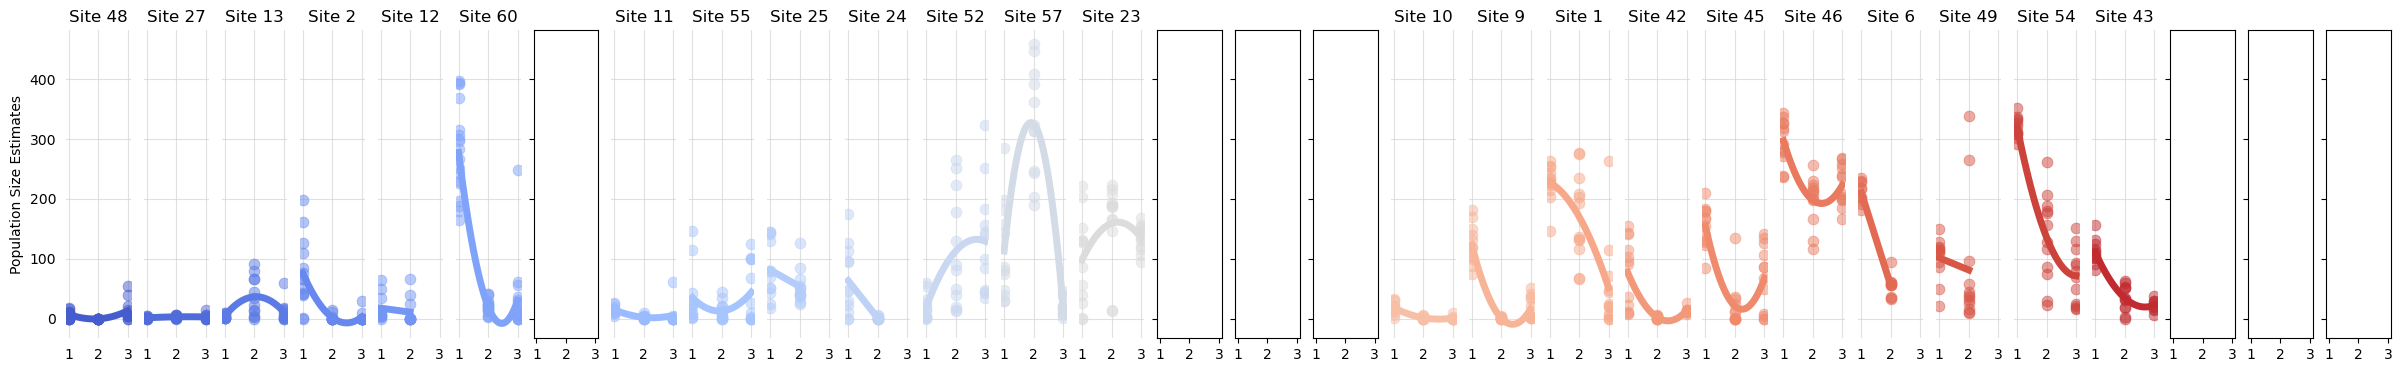

In [90]:
# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)

s_size=60
linewidth=5
alpha_scatter = 0.5
n_rows = 1
n_cols = 30
plt.rcParams['axes.axisbelow'] = True
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4), sharex=True, sharey=True)  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}
coeff_sites = {}
# Loop through each site to plot
for i, site in enumerate(order_paper):

    if site in df_cleaned['site'].unique():
        print(site)
        group = df_cleaned[df_cleaned['site'] == site]
        
        # Reshape the data from wide to long format
        group_long = group.melt(var_name='Generation', value_name='Population', value_vars=[1, 2, 3], ignore_index=False)
    
        # Drop NaN values and ensure numeric types
        group_long = group_long.dropna()
        group_long['Generation'] = pd.to_numeric(group_long['Generation'])
        group_long['Population'] = pd.to_numeric(group_long['Population'])
    
        # Get the correct subplot
        ax = axes[i] if len(axes) > 1 else axes
    
        if group_long['Generation'].nunique() == 3:
            model, x_fine, y_fine = fit_poly(group_long)
            intercept = model.intercept_  # This is the constant (c) term
            coefficients = model.coef_  #
            coeff_sites[site] = [intercept, coefficients]
            if (coefficients[1]<0) & (coefficients[2] > 0):
                ## evolutioanry rescue 
                sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =alpha_scatter, s = s_size, edgecolor=None,)
            # Plot
                ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth)
                #ax.plot(x_fine, y_fine, color='black',linewidth=1.5)
            else:
                sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =alpha_scatter, s = s_size, edgecolor=None,)
            # Plot
                ax.plot(x_fine, y_fine,color=colors[i],linewidth=linewidth)
    
        elif group_long['Generation'].nunique() < 3:
            model, x_fine, y_fine = fit_lr(group_long)
            intercept = model.intercept_  # This is the constant (c) term
            coefficients = model.coef_  #
            coeff_sites[site] = [intercept, coefficients]
            if (coefficients[0] > 0):
                ## evolutioanry rescue 
                sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha = alpha_scatter, s = s_size, edgecolor=None,)
            # Plot
                ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth)
            else:
                sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax,color=colors[i], alpha = alpha_scatter, s = s_size, edgecolor=None,)
            # Plot
                ax.plot(x_fine, y_fine, color=colors[i], linewidth=linewidth)


    # Remove spines (top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)  # Also remove the left spine if you want to clean up more
    ax.spines['bottom'].set_visible(False)  # Also remove the bottom spine for a cleaner look
        # Remove ticks for all subplots except the first one

    # Add title and labels for each subplot
    #bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size Estimates')
    ax.grid(True, color='lightgrey', alpha=0.7)
    ax.tick_params(axis='x', which='both',bottom=False)
    ax.tick_params(axis='y', which='both', left=False)
    ax.set_xlabel('')
fig.supxlabel('Generations')  # Set a common x-axis label for the entire figure

#plt.savefig('population_dynamics.png')
# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between subplots horizontally and vertically
#plt.savefig('pop_dynamics_all_equal.png')
#plt.savefig('pop_dynamics_all_equal.pdf')

In [ ]:
# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)

s_size=60
linewidth=5
alpha_scatter = 0.5
n_rows = 1
n_cols = 27
plt.rcParams['axes.axisbelow'] = True
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4), sharex=True, sharey=True)  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}
coeff_sites = {}
# Loop through each site to plot
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]

    # Reshape the data from wide to long format
    group_long = group.melt(var_name='Generation', value_name='Population', value_vars=[1, 2, 3], ignore_index=False)

    # Drop NaN values and ensure numeric types
    group_long = group_long.dropna()
    group_long['Generation'] = pd.to_numeric(group_long['Generation'])
    group_long['Population'] = pd.to_numeric(group_long['Population'])

    # Get the correct subplot
    ax = axes[i] if len(axes) > 1 else axes

    if group_long['Generation'].nunique() == 3:
        model, x_fine, y_fine = fit_poly(group_long)
        intercept = model.intercept_  # This is the constant (c) term
        coefficients = model.coef_  #
        coeff_sites[site] = [intercept, coefficients]
        if (coefficients[1]<0) & (coefficients[2] > 0):
            ## evolutioanry rescue 
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =0.7, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth)
            #ax.plot(x_fine, y_fine, color='black',linewidth=1.5)
        else:
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =0.2, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine,color=colors[i],linewidth=linewidth, alpha = 0.2)

    elif group_long['Generation'].nunique() < 3:
        model, x_fine, y_fine = fit_lr(group_long)
        intercept = model.intercept_  # This is the constant (c) term
        coefficients = model.coef_  #
        coeff_sites[site] = [intercept, coefficients]
        if (coefficients[0] > 0):
            ## evolutioanry rescue 
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax, color=colors[i], alpha =0.2, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i],linewidth=linewidth, alpha = 0.2)
        else:
            sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax,color=colors[i], alpha =0.2, s = s_size, edgecolor=None,)
        # Plot
            ax.plot(x_fine, y_fine, color=colors[i], linewidth=linewidth, alpha = 0.2)


    # Remove spines (top and right)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)  # Also remove the left spine if you want to clean up more
    ax.spines['bottom'].set_visible(False)  # Also remove the bottom spine for a cleaner look
        # Remove ticks for all subplots except the first one

    # Add title and labels for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')
    ax.grid(True, color='lightgrey', alpha=0.7)
    ax.tick_params(axis='x', which='both',bottom=False)
    ax.tick_params(axis='y', which='both', left=False)
    ax.set_xlabel('')
fig.supxlabel('Generations')  # Set a common x-axis label for the entire figure

#plt.savefig('population_dynamics.png')
# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between subplots horizontally and vertically
plt.savefig('pop_dynamics_highlighted_er.png')
plt.savefig('pop_dynamics_highlighted_er.pdf')

In [32]:
coeff_sitesdf.sort_values('cuadratic_term')

NameError: name 'coeff_sitesdf' is not defined

In [33]:
combined_sites_data = {site: [intercept] + coefficients.tolist() for site, (intercept, coefficients) in coeff_sites.items()}

In [34]:
for site, values in combined_sites_data.items():
    if len(values) == 4 and values[1] == 0:  # If it's a length-3 array (intercept + 3 coefficients)
        # Remove the zero in the second position
        combined_sites_data[site] = [values[0]] + values[2:]
    elif len(values) == 2:  # If it's a length-1 array (intercept + 1 coefficient)
        # Add a zero at the end
        combined_sites_data[site] = values + [0]
    else:
        # Keep the values as they are if neither condition applies
        combined_sites_data[site] = values

In [35]:
coeff_sitesdf = pd.DataFrame(combined_sites_data).T.reset_index()

In [36]:
coeff_sitesdf.columns = ['site', 'intercept', 'linear_term', 'cuadratic_term']

In [37]:
coeff_sitesdf = coeff_sitesdf.merge(climate)

In [38]:
parallelism = pd.read_csv('../key_files/POP_EVOLUTION_terminal_generation_parallelism.txt', sep ='\t')

In [58]:
parallelism = pd.read_csv('../key_files/generation_1_parallelism.txt', sep ='\t')

In [59]:
parallelism['site'] = parallelism['site'].astype(str)

In [60]:
parallelism_snps = parallelism[parallelism['source'] == 'snp']

parallelism_snps = parallelism_snps[['site', 'mean']]

parallelism_snps.columns = ['site', 'p_snps']

In [61]:
parallelism_ecotypes = parallelism[parallelism['source'] == 'ecotype']

parallelism_ecotypes = parallelism_ecotypes[['site', 'mean']]

parallelism_ecotypes.columns = ['site', 'p_ecotypes']

In [67]:
parallelism_ecotypes.sort_values('p_ecotypes')['site'].values

array(['48', '27', '13', '2', '12', '28', '60', '11', '55', '25', '24',
       '52', '57', '53', '37', '26', '23', '10', '9', '1', '42', '45',
       '46', '6', '49', '54', '43', '4', '5', '32'], dtype=object)

In [63]:
len(parallelism_ecotypes)

30

In [43]:
coeff_sitesdf = coeff_sitesdf.merge(parallelism_snps).merge(parallelism_ecotypes)

In [44]:
#coeff_sitesdf.to_csv('../key_files/population_dynamics.csv', index=None)

In [45]:
coeff_sitesdf = coeff_sitesdf[coeff_sitesdf['site']!='57']

In [46]:
coeff_sitesdf = coeff_sitesdf[coeff_sitesdf['cuadratic_term']!=0]

In [50]:
coeff_sitesdf.sort_values('p_ecotypes').site.values

array(['48', '27', '13', '2', '28', '11', '55', '52', '53', '10', '9',
       '1', '42', '45', '46', '54', '43', '4', '5', '32'], dtype=object)

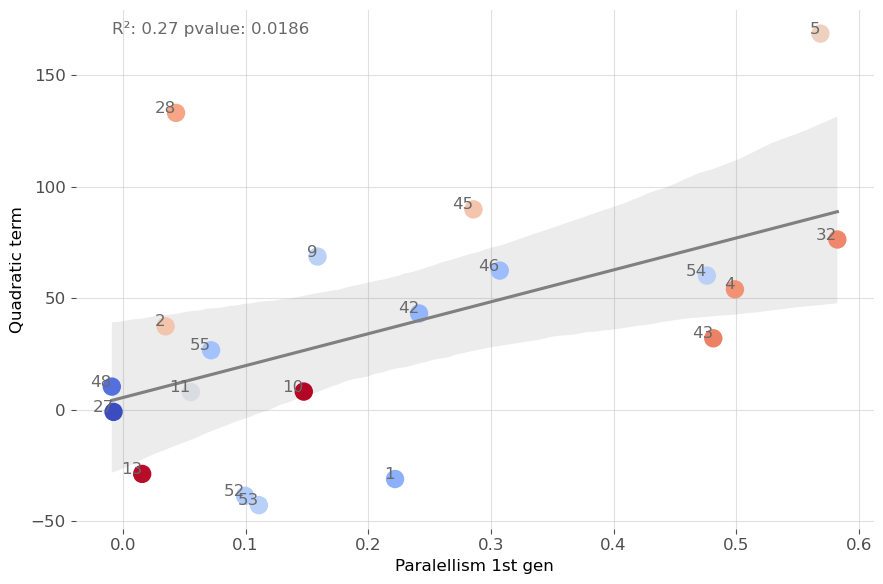

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


font_size = 12
# Assuming coeff_sitesdf is a DataFrame with columns 'site', 'p_ecotypes', 'cuadratic_term'
plt.rcParams['axes.axisbelow'] = True

# Perform linear regression using scipy to get slope, intercept, and R² value
x = coeff_sitesdf['p_ecotypes']
y = coeff_sitesdf['cuadratic_term']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the scatter plot with seaborn
plt.figure(figsize=(9, 6))
sns.regplot(
    data=coeff_sitesdf, 
    x='p_ecotypes', 
    y='cuadratic_term', 
    scatter=False,
    line_kws={'color': 'grey'}  # Color the regression line
)

sns.scatterplot(
    data=coeff_sitesdf, 
    x='p_ecotypes', 
    y='cuadratic_term', 
    hue = 'bio1', 
    palette='coolwarm',
    edgecolor=None,
    s= 150,
    legend=False,
)

# Add labels for each site at the corresponding points
for i in range(coeff_sitesdf.shape[0]):
    site = coeff_sitesdf['site'].iloc[i]
    x_value = coeff_sitesdf['p_ecotypes'].iloc[i]
    y_value = coeff_sitesdf['cuadratic_term'].iloc[i]
    plt.text(x_value, y_value, site, fontsize=12, ha='right', color = 'dimgray')  # ha='right' adjusts horizontal alignment

# Display the slope and R² on the plot
plt.text(min(x), max(y), f'R²: {r_value**2:.2f} pvalue: {p_value:.4f}', fontsize=12, color='dimgray')

## labels 
plt.ylabel('Quadratic term')
plt.xlabel('Paralellism 1st gen')

plt.rc('font', family='sans-serif', size=font_size, weight='normal')  # Regular font size
plt.rc('axes', titlesize=font_size, labelsize=font_size)  # Title and label size for axes
plt.rc('xtick', labelsize=font_size)  # X tick labels size
plt.rc('ytick', labelsize=font_size)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
plt.grid(True, color='lightgrey', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig('parallelism_ecotypes_cuadratic_term.png')
plt.savefig('parallelism_ecotypes_cuadratic_term.svg')


plt.show()




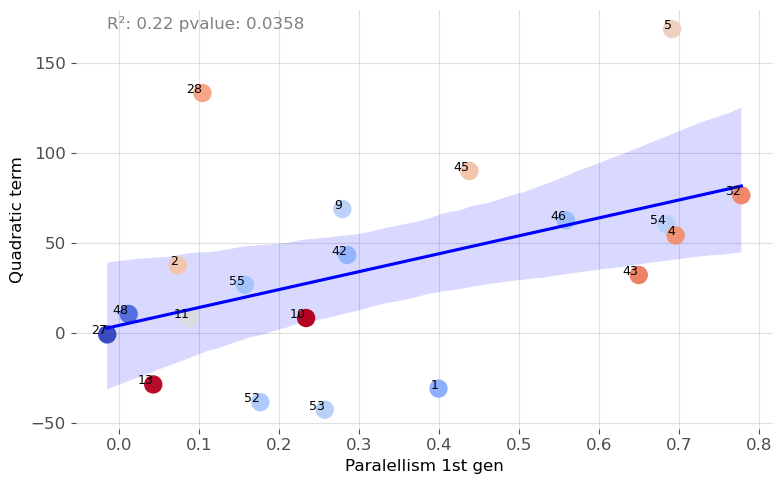

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


font_size = 12
# Assuming coeff_sitesdf is a DataFrame with columns 'site', 'p_ecotypes', 'cuadratic_term'
plt.rcParams['axes.axisbelow'] = True

# Perform linear regression using scipy to get slope, intercept, and R² value
x = coeff_sitesdf['p_snps']
y = coeff_sitesdf['cuadratic_term']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the scatter plot with seaborn
plt.figure(figsize=(8, 5))
sns.regplot(
    data=coeff_sitesdf, 
    x='p_snps', 
    y='cuadratic_term', 
    scatter=False,
    line_kws={'color': 'blue'}  # Color the regression line
)

sns.scatterplot(
    data=coeff_sitesdf, 
    x='p_snps', 
    y='cuadratic_term', 
    hue = 'bio1', 
    palette='coolwarm',
    edgecolor=None,
    s= 150,
    legend=False,
)

# Add labels for each site at the corresponding points
for i in range(coeff_sitesdf.shape[0]):
    site = coeff_sitesdf['site'].iloc[i]
    x_value = coeff_sitesdf['p_snps'].iloc[i]
    y_value = coeff_sitesdf['cuadratic_term'].iloc[i]
    plt.text(x_value, y_value, site, fontsize=9, ha='right')  # ha='right' adjusts horizontal alignment

# Display the slope and R² on the plot
plt.text(min(x), max(y), f'R²: {r_value**2:.2f} pvalue: {p_value:.4f}', fontsize=12, color='grey')

## labels 
plt.ylabel('Quadratic term')
plt.xlabel('Paralellism 1st gen')

plt.rc('font', family='sans-serif', size=font_size, weight='normal')  # Regular font size
plt.rc('axes', titlesize=font_size, labelsize=font_size)  # Title and label size for axes
plt.rc('xtick', labelsize=font_size)  # X tick labels size
plt.rc('ytick', labelsize=font_size)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
plt.grid(True, color='lightgrey', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig('parallelism_cuadratic_term.png')

plt.show()




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming coeff_sitesdf is a DataFrame with columns 'site', 'p_ecotypes', 'cuadratic_term'

# Perform linear regression using scipy to get slope, intercept, and R² value
x = coeff_sitesdf['p_ecotypes']
y = coeff_sitesdf['cuadratic_term']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the scatter plot with seaborn
plt.figure(figsize=(8, 5))
scatter_plot = sns.regplot(
    data=coeff_sitesdf, 
    x='p_ecotypes', 
    y='cuadratic_term', 
    scatter_kws={'s': 50},  # Adjust point size
    line_kws={'color': 'blue'}  # Color the regression line
)

# Add labels for each site at the corresponding points
for i in range(coeff_sitesdf.shape[0]):
    site = coeff_sitesdf['site'].iloc[i]
    x_value = coeff_sitesdf['p_ecotypes'].iloc[i]
    y_value = coeff_sitesdf['cuadratic_term'].iloc[i]
    plt.text(x_value, y_value, site, fontsize=9, ha='right')  # ha='right' adjusts horizontal alignment

# Display the slope and R² on the plot
plt.text(min(x), max(y), f'R²: {r_value**2:.2f}', fontsize=12, color='blue')

# Display the plot
plt.tight_layout()
plt.show()


In [272]:
coeff_sitesdf

site   intercept  linear_term  cuadratic_term       bio1    p_snps  \
0    24   63.583333   -62.416667        0.000000   6.008861  0.115742   
1    27    1.583333     5.166667       -3.666667   7.425145 -0.014482   
2    48    7.333333   -35.500000       41.666667   8.506768  0.012254   
3     1  227.166667   -51.500000     -124.000000  10.743906  0.399356   
4    42   77.833333  -236.866667      172.733333  10.927050  0.285304   
5    46  297.083333  -323.333333      249.666667  11.277027  0.558565   
6    25   81.416667   -27.666667        0.000000  11.393515  0.111906   
7    55   35.333333   -97.916667      106.833333  11.564501  0.157314   
8    49  101.666667   -20.250000        0.000000  11.721280  0.528235   
9    52   19.250000   264.250000     -154.166667  12.005284  0.176809   
11   53   98.083333   207.750000     -170.833333  12.362217  0.257256   
12   54  319.500000  -488.666667      240.666667  12.440169  0.684013   
13    9  123.166667  -381.416667      274.833333  12.481669  0.279275   
14   12   17.750000    -6.666667        0.000000  12.957162  0.100474   
15   11   15.000000   -41.083333       31.833333  13.801396  0.088494   
16    6  210.600000  -155.700000        0.000000  14.989079  0.480042   
17    5  202.000000  -609.916667      674.500000  14.996355  0.691080   
18    2   76.285714  -223.142857      149.714286  15.594627  0.073612   
19   45  154.083333  -445.500000      359.333333  15.654286  0.437937   
20   28  277.555556  -779.388889      532.333333  16.868309  0.104456   
21    4  200.000000  -387.500000      216.000000  17.513474  0.695603   
22   32  152.833333  -421.000000      305.333333  17.815169  0.777680   
23   43  111.166667  -216.611111      128.222222  18.000951  0.649524   
24   13    4.416667   121.916667     -114.833333  20.412710  0.043040   
25   10   18.416667   -49.883333       32.766667  20.550923  0.233950   

    p_ecotypes  
0     0.081754  
1    -0.007645  
2    -0.009063  
3     0.221854  
4     0.241460  
5     0.307219  
6     0.072344  
7     0.071886  
8     0.371816  
9     0.099618  
11    0.110851  
12    0.476094  
13    0.158673  
14    0.039891  
15    0.055337  
16    0.331436  
17    0.568639  
18    0.034774  
19    0.285783  
20    0.043322  
21    0.498951  
22    0.582438  
23    0.481292  
24    0.015694  
25    0.147432

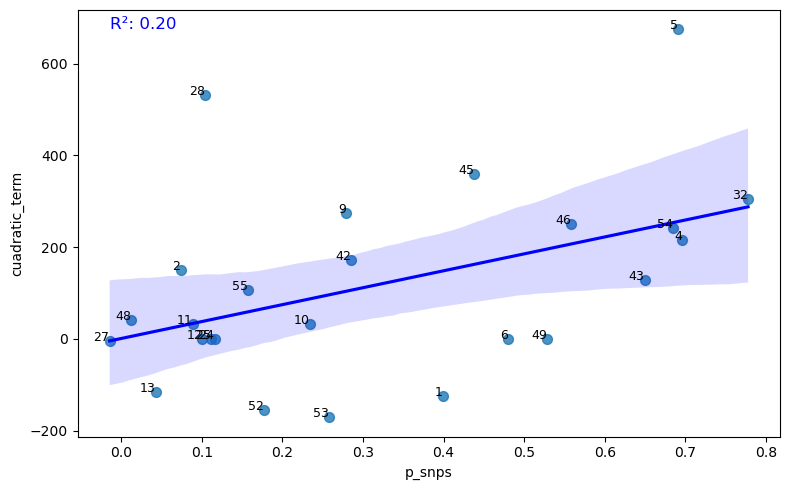

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming coeff_sitesdf is a DataFrame with columns 'site', 'p_ecotypes', 'cuadratic_term'

# Perform linear regression using scipy to get slope, intercept, and R² value
x = coeff_sitesdf['p_snps']
y = coeff_sitesdf['cuadratic_term']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create the scatter plot with seaborn
plt.figure(figsize=(8, 5))
scatter_plot = sns.regplot(
    data=coeff_sitesdf, 
    x='p_snps', 
    y='cuadratic_term', 
    scatter_kws={'s': 50},  # Adjust point size
    line_kws={'color': 'blue'}  # Color the regression line
)

# Add labels for each site at the corresponding points
for i in range(coeff_sitesdf.shape[0]):
    site = coeff_sitesdf['site'].iloc[i]
    x_value = coeff_sitesdf['p_snps'].iloc[i]
    y_value = coeff_sitesdf['cuadratic_term'].iloc[i]
    plt.text(x_value, y_value, site, fontsize=9, ha='right')  # ha='right' adjusts horizontal alignment

# Display the slope and R² on the plot
plt.text(min(x), max(y), f'R²: {r_value**2:.2f}', fontsize=12, color='blue')

# Display the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='bio1', ylabel='intercept'>

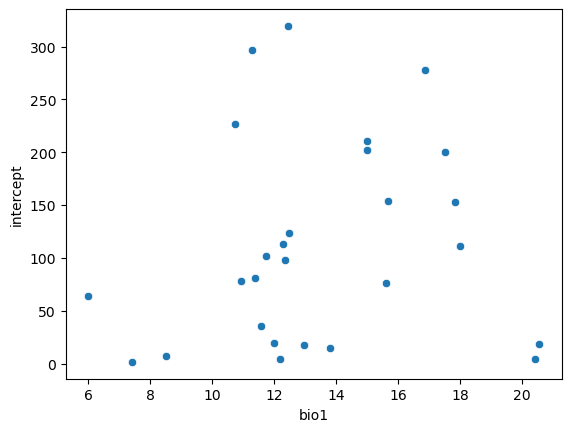

In [228]:
sns.scatterplot(coeff_sitesdf, x = 'bio1', y = 'intercept')

In [76]:
# Step 1: Create polynomial features
poly = PolynomialFeatures(degree=2)  # 2-degree polynomial
x_poly = poly.fit_transform(x)  # Transform x into polynomial features

In [79]:
# Step 2: Fit the model using LinearRegression (no ridge)
model = LinearRegression()
model.fit(x_poly, y)  # Fit the model

LinearRegression()

In [80]:
# Step 3: Retrieve the coefficients
coefficients = model.coef_  # This will give you the polynomial coefficients
# Step 3: Retrieve the coefficients and intercept
intercept = model.intercept_  # This is the constant (c) term
coefficients = model.coef_  # Coefficients for the polynomial terms

In [82]:
model

LinearRegression()

In [83]:
intercept

18.200000000000003

In [81]:
coefficients

array([  0. , -50.7,  33.8])

In [74]:
x_fine_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-02, 1.02030405e-04],
       [1.00000000e+00, 2.02020202e-02, 4.08121620e-04],
       [1.00000000e+00, 3.03030303e-02, 9.18273646e-04],
       [1.00000000e+00, 4.04040404e-02, 1.63248648e-03],
       [1.00000000e+00, 5.05050505e-02, 2.55076013e-03],
       [1.00000000e+00, 6.06060606e-02, 3.67309458e-03],
       [1.00000000e+00, 7.07070707e-02, 4.99948985e-03],
       [1.00000000e+00, 8.08080808e-02, 6.52994592e-03],
       [1.00000000e+00, 9.09090909e-02, 8.26446281e-03],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02],
       [1.00000000e+00, 1.21212121e-01, 1.46923783e-02],
       [1.00000000e+00, 1.31313131e-01, 1.72431385e-02],
       [1.00000000e+00, 1.41414141e-01, 1.99979594e-02],
       [1.00000000e+00, 1.51515152e-01, 2.29568411e-02],
       [1.00000000e+00, 1.61616162e-01, 2.61197837e-02],
       [1.00000000e+00, 1.71717

In [ ]:
y_fine

In [56]:
# After fitting your polynomial model

# For a 3rd degree polynomial, get the second derivative
a, b, _, _ = coefficients  # Coefficients correspond to x^3, x^2, x, constant terms
second_derivative = 6 * a * x + 2 * b

# Check the sign of the second derivative to detect rescue
rescue_detected = np.any(second_derivative < 0) and np.any(second_derivative > 0)

if rescue_detected:
    print(f'Evolutionary rescue detected at site {site}')
else:
    print(f'No evolutionary rescue detected at site {site}')


No evolutionary rescue detected at site 10


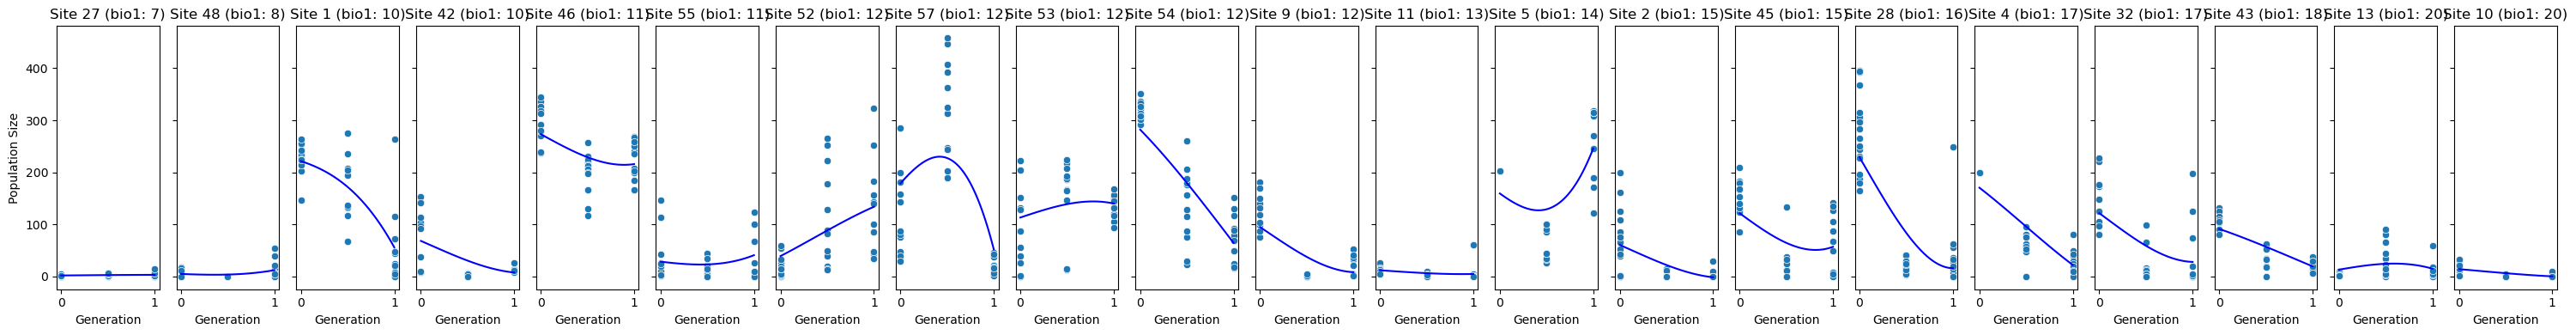

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `grouped_sites_with_bio1_sorted` contains the sorted data by site and bio1

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 1
n_cols = 21
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 4), sharex=True, sharey=True)  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}

# Loop through each site to plot
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]

    # Reshape the data from wide to long format
    group_long = group.melt(var_name='Generation', value_name='Population', value_vars=[1, 2, 3], ignore_index=False)

    # Drop NaN values and ensure numeric types
    group_long = group_long.dropna()
    group_long['Generation'] = pd.to_numeric(group_long['Generation'])
    group_long['Population'] = pd.to_numeric(group_long['Population'])
    group_long['Generation'] = (group_long['Generation'] - np.min(group_long['Generation'])) / (np.max(group_long['Generation']) - np.min(group_long['Generation']))

    # Get the correct subplot
    ax = axes[i] if len(axes) > 1 else axes
    # Prepare data
    x = group_long['Generation'].values.reshape(-1, 1)
    y = group_long['Population'].values
    
    # Ridge polynomial regression with degree 2
    model = make_pipeline(PolynomialFeatures(3), Ridge(alpha=1))
    model.fit(x, y)
    
    # Predict values for plotting
    x_fine = np.linspace(min(x), max(x), 100).reshape(-1, 1)
    y_fine = model.predict(x_fine)
    sns.scatterplot(data=group_long, x='Generation', y='Population', ax=ax)

    # Plot
    ax.plot(x_fine, y_fine, color='blue')
    # Add title and labels for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

# Adjust the layout
plt.tight_layout()

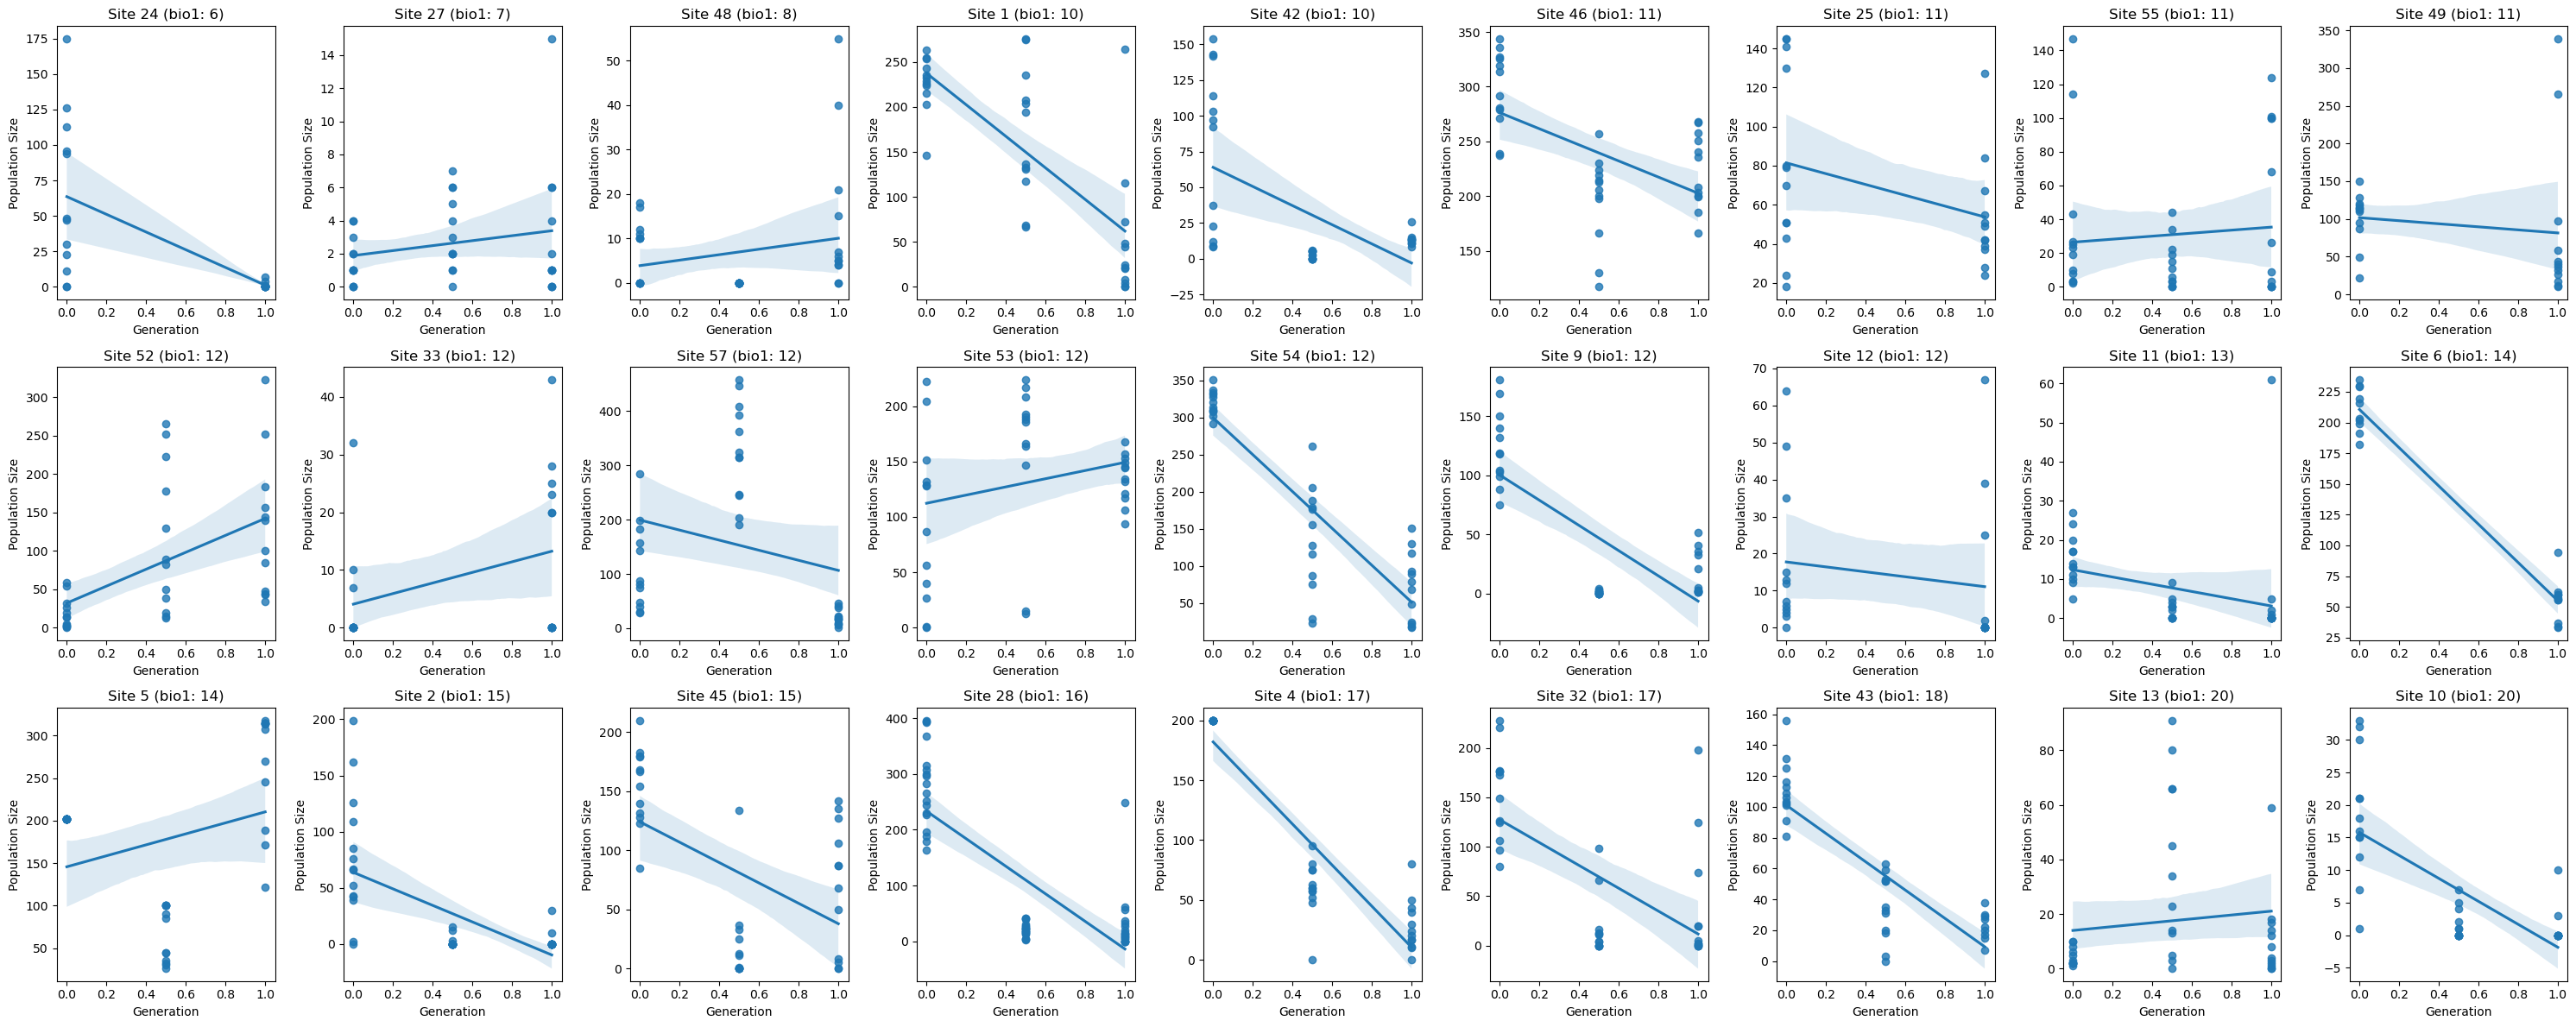

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `grouped_sites_with_bio1_sorted` contains the sorted data by site and bio1

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 3
n_cols = 9
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 12))  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}

# Loop through each site to plot
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]

    # Reshape the data from wide to long format
    group_long = group.melt(var_name='Generation', value_name='Population', value_vars=[1, 2, 3], ignore_index=False)

    # Drop NaN values and ensure numeric types
    group_long = group_long.dropna()
    group_long['Generation'] = pd.to_numeric(group_long['Generation'])
    group_long['Population'] = pd.to_numeric(group_long['Population'])
    group_long['Generation'] = (group_long['Generation'] - np.min(group_long['Generation'])) / (np.max(group_long['Generation']) - np.min(group_long['Generation']))

    # Get the correct subplot
    ax = axes[i] if len(axes) > 1 else axes

    # Fit a polynomial regression with seaborn's regplot
    sns.regplot(data=group_long, x='Generation', y='Population', order=1, ax=ax)

    # Add title and labels for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

# Adjust the layout
plt.tight_layout()
plt.show()


In [230]:
group[[]]

1    2   3 site
site_plot                     
24_1        30.0  0.0 NaN   24
24_2       126.0  0.0 NaN   24
24_3       113.0  0.0 NaN   24
24_4        94.0  0.0 NaN   24
24_5        23.0  0.0 NaN   24
24_6         0.0  1.0 NaN   24
24_7        47.0  1.0 NaN   24
24_8         0.0  0.0 NaN   24
24_9        48.0  0.0 NaN   24
24_10       11.0  7.0 NaN   24
24_11       96.0  4.0 NaN   24
24_12      175.0  1.0 NaN   24

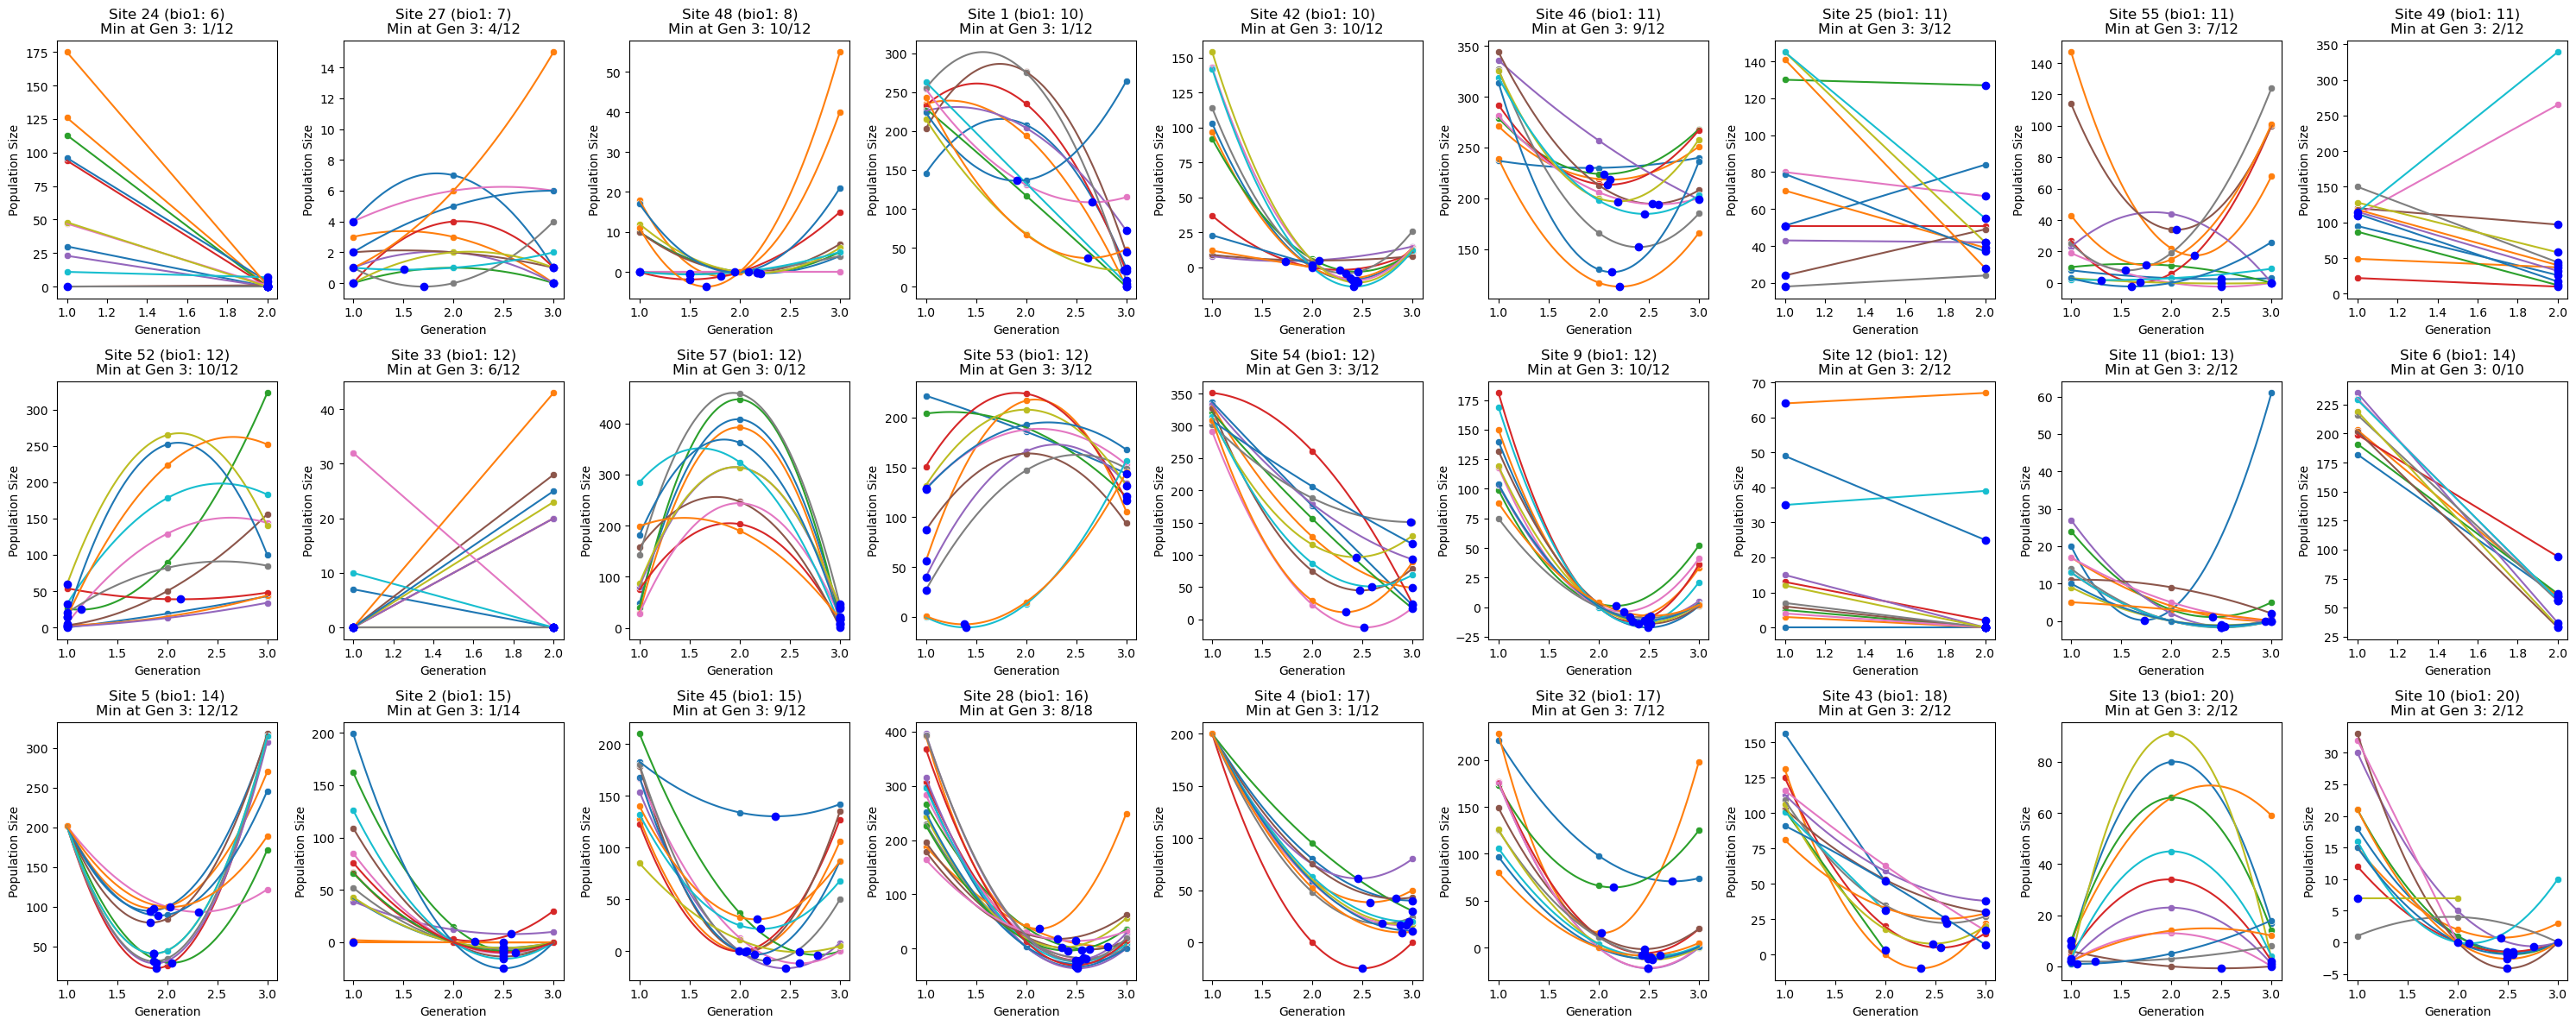

In [212]:
x_full = np.array([1, 2, 3])  # Generation values

grouped_sites_with_bio1 = pd.merge(df_cleaned[['site']], climate, on='site').drop_duplicates()

grouped_sites_with_bio1_sorted = grouped_sites_with_bio1.sort_values(by='bio1')

# Function to fit 2nd degree polynomial and find the minimum point
def fit_and_find_min(row):
    
    row = row[[1,2,3]].astype(float)
    valid_gen = row.dropna()  # Get non-NaN values
    x = x_full[:len(valid_gen)]  # Adjust x values based on number of generations

    if len(valid_gen) == 3:
        # Fit a 2nd-degree polynomial for 3 data points
        coefficients = np.polyfit(x, valid_gen, 2)
        poly_eqn = np.poly1d(coefficients)
    elif len(valid_gen) == 2:
        # Fit a 1st-degree polynomial for 2 data points
        coefficients = np.polyfit(x, valid_gen, 1)
        poly_eqn = np.poly1d(coefficients)
    else:
        raise ValueError("Not enough data points to fit a polynomial")

    # Generate fine-grained points to plot
    x_fine = np.linspace(min(x), max(x), 100)
    y_fine = poly_eqn(x_fine)

    # Find the minimum point for 2nd-degree polynomial (for linear, return end points)
    if len(valid_gen) == 3:
        min_index = np.argmin(y_fine)
        min_x = x_fine[min_index]
        min_y = y_fine[min_index]
    else:
        # Min for linear polynomial: check both ends
        if y_fine[0] < y_fine[-1]:
            min_x = x_fine[0]
            min_y = y_fine[0]
        else:
            min_x = x_fine[-1]
            min_y = y_fine[-1]

    return min_x, min_y, x_fine, y_fine

    return min_x, min_y, x_fine, y_fine
# Plotting each site in a subplot

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 3
n_cols = 9
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 12))  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]
    ax = axes[i] if n_sites > 1 else axes  # Handle single vs. multiple subplots
    count_er = 0

    for idx, row in group.iterrows():
        # Fit polynomial and find the minimum point
        min_x, min_y, x_fine, y_fine = fit_and_find_min(row)
        row = row[[1, 2, 3]].astype(float)
        x=x_full[:len(row.dropna())]
        row = row.dropna()
        # Plot original data points
        sns.scatterplot(x=x, y=row, legend=False, ax=ax)

        # Plot the fitted polynomial curve
        ax.plot(x_fine, y_fine)

        # Highlight the minimum point
        ax.scatter(min_x, min_y, color='blue', zorder=10)
        # Check if the minimum point is in the last generation (generation 3)
        if row.iloc[-2,] < row.iloc[-1,]:

            count_er += 1  # Increment the counter if min point is at generation 3

    # Store the count in the dictionary for this site
    site_min_in_last_gen[site] = count_er

    # Add labels and title for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})\nMin at Gen 3: {count_er}/{len(group)}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

plt.tight_layout()
plt.show()


0      30.0
1       0.0
2        24
3     126.0
4       0.0
5        24
6     113.0
7       0.0
8        24
9      94.0
10      0.0
11       24
12     23.0
13      0.0
14       24
15      0.0
16      1.0
17       24
18     47.0
19      1.0
20       24
21      0.0
22      0.0
23       24
24     48.0
25      0.0
26       24
27     11.0
28      7.0
29       24
30     96.0
31      4.0
32       24
33    175.0
34      1.0
35       24
dtype: object
[1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3 1 2 3]
Skipping polynomial fit: Not enough valid points


ValueError: All arrays must be of the same length

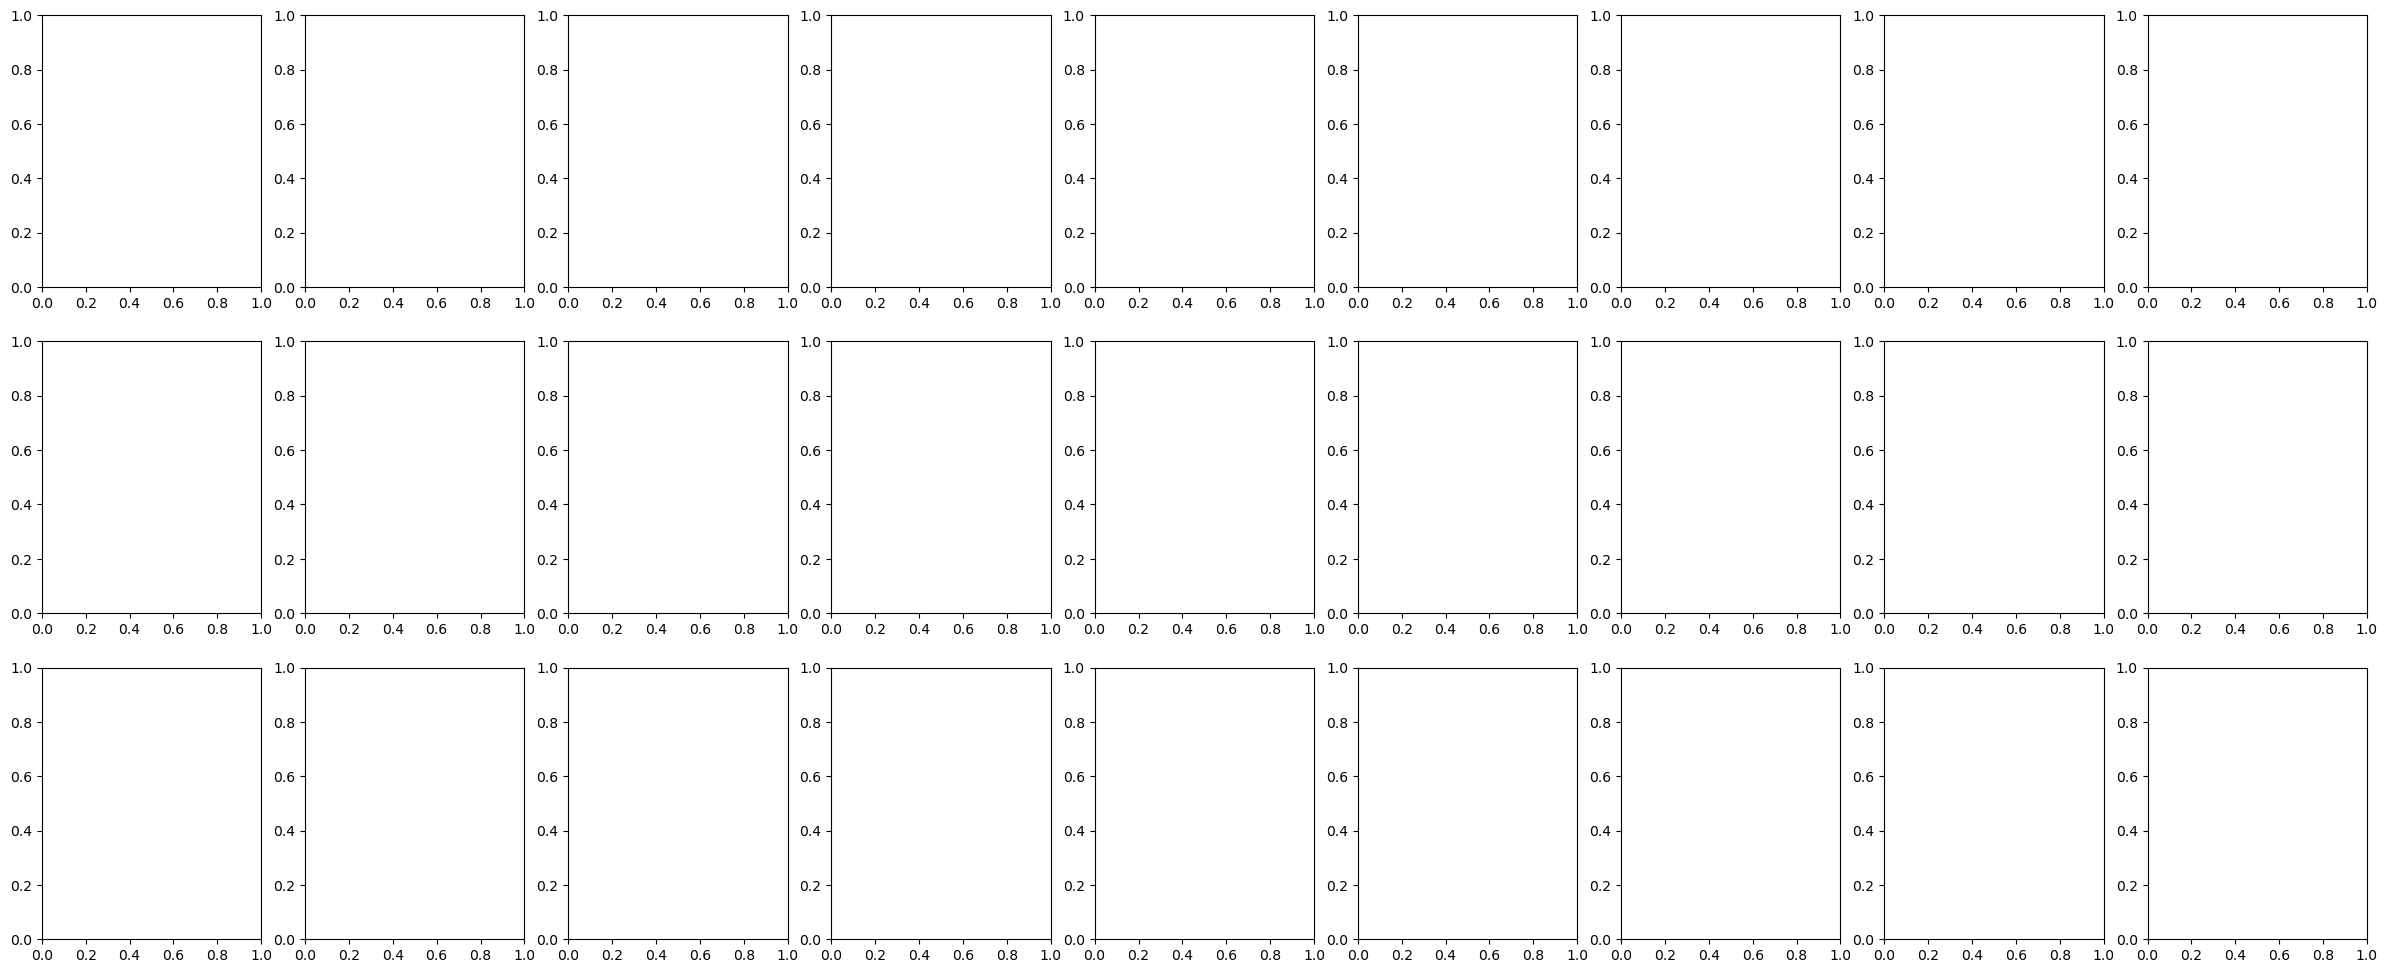

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `grouped_sites_with_bio1_sorted` contains the sorted data by site and bio1

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 3
n_cols = 9
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 12))  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}

# Function to fit a polynomial for all points in a site
def fit_polynomial_all_points(x_points, y_points):
    valid_y = y_points.dropna()  # Get non-NaN values
    valid_x = x_points[:len(valid_y)]  # Adjust x values based on number of y points
    print(valid_y)    
    print(valid_x)
    if len(valid_y) == 3:
        # Fit a 2nd-degree polynomial for 3 data points
        coefficients = np.polyfit(valid_x, valid_y, 2)
        poly_eqn = np.poly1d(coefficients)
    elif len(valid_y) == 2:
        # Fit a 1st-degree polynomial for 2 data points
        coefficients = np.polyfit(valid_x, valid_y, 1)
        poly_eqn = np.poly1d(coefficients)
    else:
        print("Skipping polynomial fit: Not enough valid points")
        return None, None, None, None 

    # Generate fine-grained points to plot
    x_fine = np.linspace(min(valid_x), max(valid_x), 100)
    y_fine = poly_eqn(x_fine)

    # Find the minimum point for 2nd-degree polynomial (for linear, return end points)
    if len(valid_y) == 3:
        min_index = np.argmin(y_fine)
        min_x = x_fine[min_index]
        min_y = y_fine[min_index]
    else:
        # Min for linear polynomial: check both ends
        if y_fine[0] < y_fine[-1]:
            min_x = x_fine[0]
            min_y = y_fine[0]
        else:
            min_x = x_fine[-1]
            min_y = y_fine[-1]

    return min_x, min_y, x_fine, y_fine

# Plot each site in a subplot
x_full = np.array([1, 2, 3])  # Generation values
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]
    ax = axes[i] if n_sites > 1 else axes  # Handle single vs. multiple subplots

    # Prepare x and y points by concatenating all the data points from all samples
    x_points = np.concatenate([np.tile(x_full[:len(row.dropna())], len(row.dropna())) for idx, row in group.iterrows()])
    y_points = np.concatenate([row.dropna().values for idx, row in group.iterrows()])

    # Fit polynomial to all points in the site
    min_x, min_y, x_fine, y_fine = fit_polynomial_all_points(x_points, pd.Series(y_points))

    # Plot all individual data points
    sns.scatterplot(x=x_points, y=y_points, legend=False, ax=ax)

    # Plot the fitted polynomial curve for the combined data
    ax.plot(x_fine, y_fine)

    # Highlight the minimum point
    ax.scatter(min_x, min_y, color='blue', zorder=10)

    # Store the count in the dictionary for this site
    count_er = int(min_x == 3)  # Check if the minimum point is in generation 3
    site_min_in_last_gen[site] = count_er

    # Add labels and title for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})\nMin at Gen 3: {count_er}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

# Turn off any unused subplots if there are fewer than 27 sites
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print out the quantification for each site
for site, count in site_min_in_last_gen.items():
    print(f'Site {site}: Minimum population point is in the last generation (generation 3): {count}')


In [221]:
np.polyfit([1,2], group[[1,2]], 1)

TypeError: expected x and y to have same length

In [222]:
# Example data: two generations and multiple samples
x = np.array([1, 2])  # Generation values
y_sample1 = np.array([100, 150])  # Population sizes for sample 1
y_sample2 = np.array([120, 130])  # Population sizes for sample 2

# Combine y values from all samples
y_combined = np.concatenate([y_sample1, y_sample2])

# Replicate x values for each sample
x_combined = np.tile(x, 2)  # Replicating x twice (once for each sample)

# Fit a 1st-degree polynomial (linear fit)
coefficients = np.polyfit(x_combined, y_combined, 1)  # Fit a linear polynomial

# Create the polynomial equation
poly_eqn = np.poly1d(coefficients)

In [223]:
# Generate values for plotting the fitted curve
x_fine = np.linspace(1, 2, 100)
y_fine = poly_eqn(x_fine)

# Output the polynomial equation and coefficients
print("Fitted Polynomial Equation:", poly_eqn)
print("Coefficients:", coefficients)

Fitted Polynomial Equation:  
30 x + 80
Coefficients: [30. 80.]


In [224]:
x_combined

array([1, 2, 1, 2])

In [225]:
y_combined

array([100, 150, 120, 130])

In [ ]:
def fit_polynomial_all_points(x_points, y_points):
    valid_y = y_points.dropna()  # Get non-NaN values
    valid_x = x_points[:len(valid_y)]  # Adjust x values based on number of y points

    if len(valid_y) == 3:
        # Fit a 2nd-degree polynomial for 3 data points
        coefficients = np.polyfit(valid_x, valid_y, 2)
        poly_eqn = np.poly1d(coefficients)
    elif len(valid_y) == 2:
        # Fit a 1st-degree polynomial for 2 data points
        coefficients = np.polyfit(valid_x, valid_y, 1)
        poly_eqn = np.poly1d(coefficients)
    else:
        raise ValueError("Not enough data points to fit a polynomial")

    # Generate fine-grained points to plot
    x_fine = np.linspace(min(valid_x), max(valid_x), 100)
    y_fine = poly_eqn(x_fine)

    # Find the minimum point for 2nd-degree polynomial (for linear, return end points)
    if len(valid_y) == 3:
        min_index = np.argmin(y_fine)
        min_x = x_fine[min_index]
        min_y = y_fine[min_index]
    else:
        # Min for linear polynomial: check both ends
        if y_fine[0] < y_fine[-1]:
            min_x = x_fine[0]
            min_y = y_fine[0]
        else:
            min_x = x_fine[-1]
            min_y = y_fine[-1]

    return min_x, min_y, x_fine, y_fine

TypeError: fit_polynomial_all_points() missing 1 required positional argument: 'y_points'

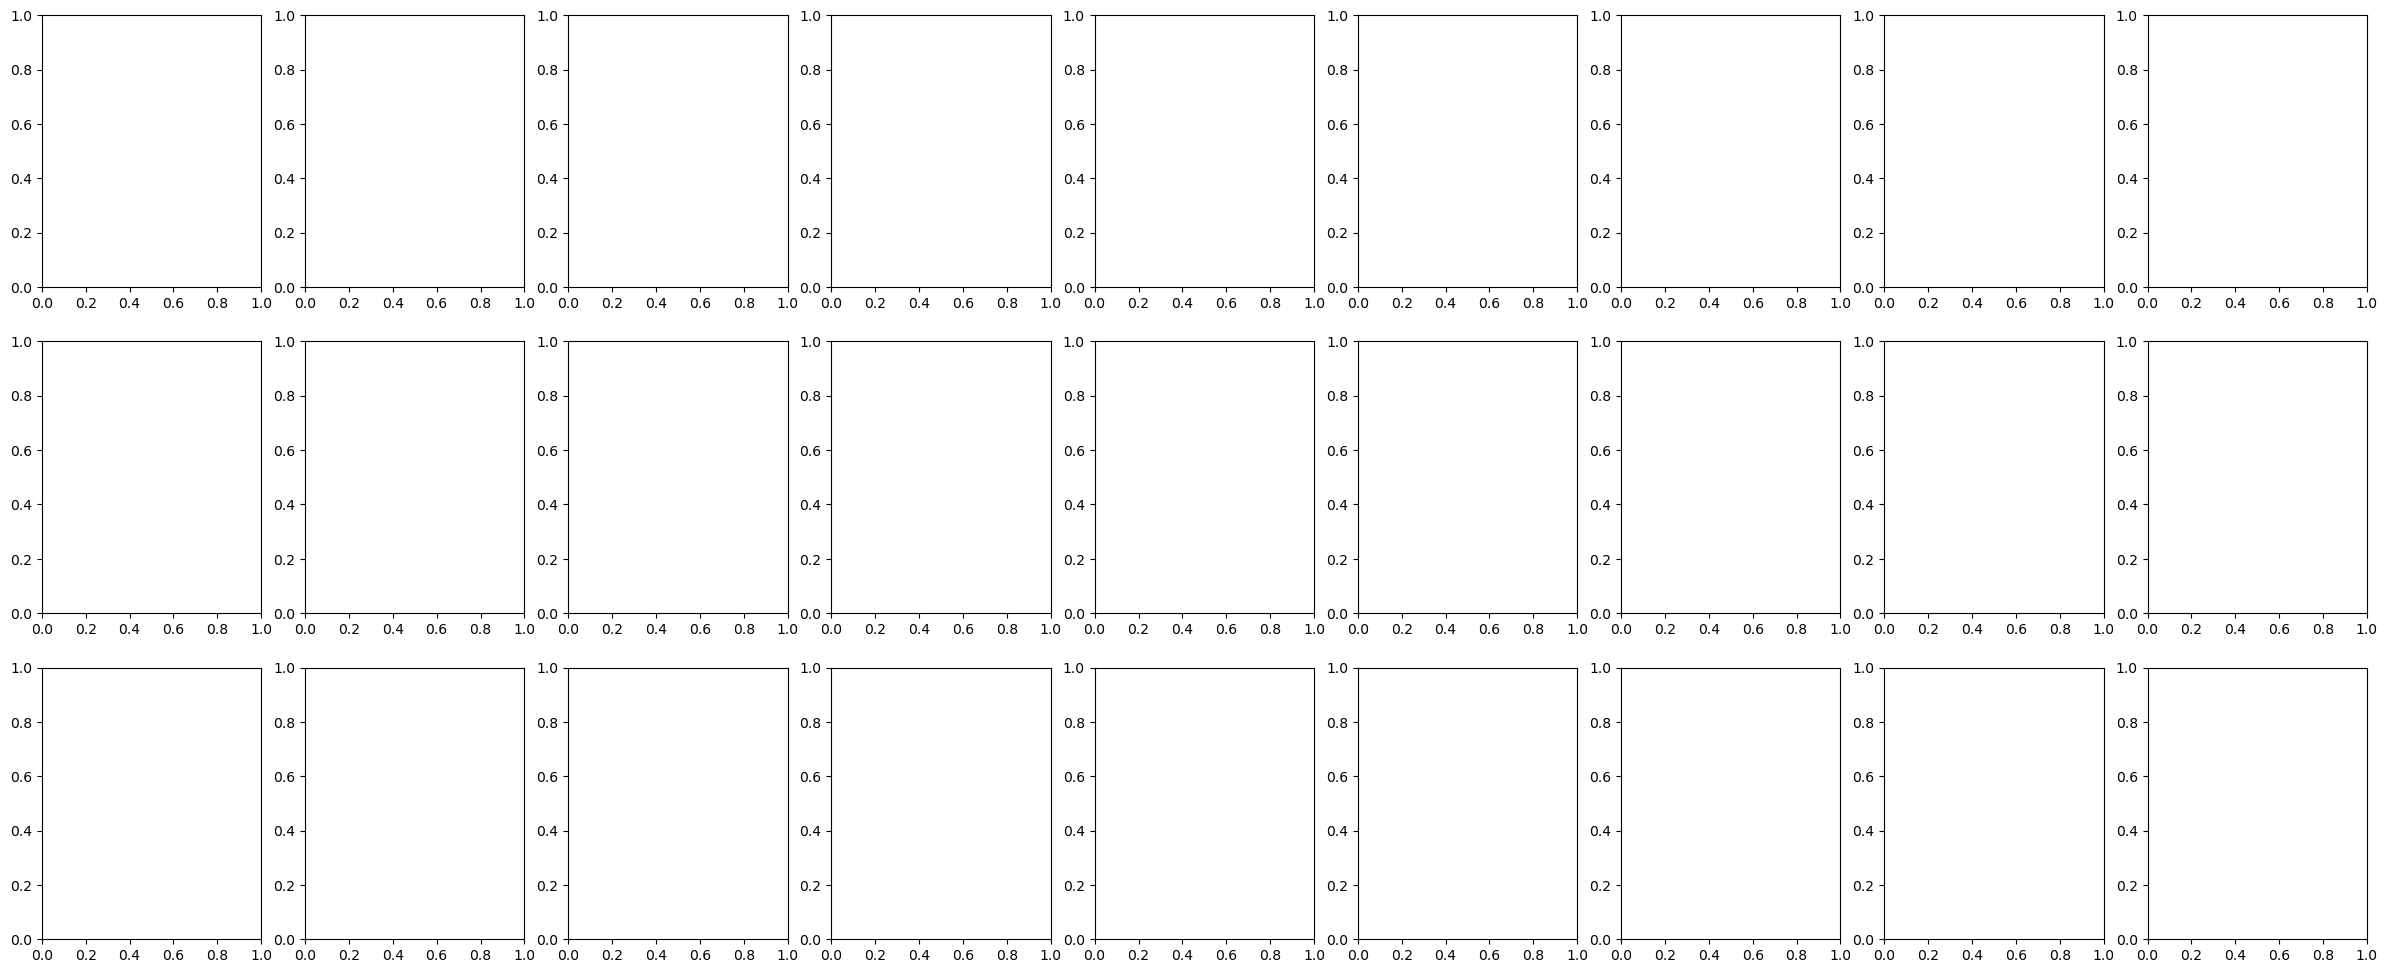

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `grouped_sites_with_bio1_sorted` contains the sorted data by site and bio1

# Set up 3 rows and 9 columns for a total of 27 subplots (adjust to your total sites)
n_rows = 3
n_cols = 9
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 12))  # 8x4 per plot, adjust as needed
axes = axes.flatten()  # Flatten the 2D axes array into 1D to easily iterate over

site_min_in_last_gen = {}

# Function to fit a polynomial for aggregated data
# Function to fit a polynomial for all points in a site


# Plot each site in a subplot
x_full = np.array([1, 2, 3])  # Generation values
for i, site in enumerate(grouped_sites_with_bio1_sorted['site']):
    group = df_cleaned[df_cleaned['site'] == site]
    ax = axes[i] if n_sites > 1 else axes  # Handle single vs. multiple subplots
    
    # Aggregate the data by taking the mean for each generation
    
    # Fit polynomial to the aggregated data for the site
    min_x, min_y, x_fine, y_fine = fit_polynomial_all_points(group)

    # Plot the aggregated data points
    sns.scatterplot(x=x_full[:len(aggregated_data.dropna())], y=aggregated_data.dropna(), legend=False, ax=ax)

    # Plot the fitted polynomial curve for the aggregated data
    ax.plot(x_fine, y_fine)

    # Highlight the minimum point
    ax.scatter(min_x, min_y, color='blue', zorder=10)

    # Store the count in the dictionary for this site
    count_er = int(min_x == 3)  # Check if the minimum point is in generation 3
    site_min_in_last_gen[site] = count_er

    # Add labels and title for each subplot
    bio1_value = int(grouped_sites_with_bio1_sorted.loc[grouped_sites_with_bio1_sorted["site"] == site, "bio1"].values[0])
    ax.set_title(f'Site {site} (bio1: {bio1_value})\nMin at Gen 3: {count_er}')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Population Size')

# Turn off any unused subplots if there are fewer than 27 sites
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print out the quantification for each site
for site, count in site_min_in_last_gen.items():
    print(f'Site {site}: Minimum population point is in the last generation (generation 3): {count}')


In [216]:
group[[1, 2, 3]]

1    2   3
site_plot                
24_1        30.0  0.0 NaN
24_2       126.0  0.0 NaN
24_3       113.0  0.0 NaN
24_4        94.0  0.0 NaN
24_5        23.0  0.0 NaN
24_6         0.0  1.0 NaN
24_7        47.0  1.0 NaN
24_8         0.0  0.0 NaN
24_9        48.0  0.0 NaN
24_10       11.0  7.0 NaN
24_11       96.0  4.0 NaN
24_12      175.0  1.0 NaN

In [162]:
climate

site       bio1
0      1  10.743906
1     10  20.550923
2     11  13.801396
3     12  12.957162
4     13  20.412710
5     19  12.356965
6      2  15.594627
7     20  12.664749
8     21  11.534019
9     23   7.290877
10    24   6.008861
11    25  11.393515
12    26  21.603356
13    27   7.425145
14    28  16.868309
15     3   8.091410
16    30  11.802171
17    32  17.815169
18    33  12.198703
19    35  10.793042
20    37   8.130012
21     4  17.513474
22    41  10.983648
23    42  10.927050
24    43  18.000951
25    45  15.654286
26    46  11.277027
27    47  12.367914
28    48   8.506768
29    49  11.721280
30     5  14.996355
31    50   8.160572
32    51   9.167191
33    52  12.005284
34    53  12.362217
35    54  12.440169
36    55  11.564501
37    56   7.154544
38    57  12.276481
39    58   0.407027
40     6  14.989079
41    60  19.248051
42     7  10.394866
43     9  12.481669

In [32]:


pop = pd.read_csv('../../grenenet_cleaning/grenenet/pop_size_estimations.csv')

climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

pop = pop.merge(climate, on ='site')

pop['site_plot'] = pop['site'].astype(str) + '_' + pop['plot'].astype(str)

bio1 = pop[['site_plot', 'bio1']]

bio1 = bio1.drop_duplicates().set_index('site_plot')

pop_pivot = pop.pivot_table(index = 'site_plot', columns = 'generation', values = 'totalplantnumber_complete')

pop_pivot = pop_pivot[[1,2,3]]


In [33]:
# Merge the two dataframes on the index
merged_df = pop_pivot.join(bio1)

In [34]:
merged_df = merged_df.sort_values('bio1')

In [43]:
merged_df = merged_df.dropna(thresh=3) 

In [51]:
merged_df.columns

Index([1, 2, 3, 'bio1'], dtype='object')

In [47]:
df = merged_df.head(10).copy()

In [81]:
df

1          2    3      bio1
site_plot                                      
24_12      178.774656   2.843470  NaN  6.008861
24_11       57.462767   7.184000  NaN  6.008861
24_10       24.449779  12.424581  NaN  6.008861
24_7        41.497359   2.843470  NaN  6.008861
27_9         0.663979   9.000000  1.0  7.425145
27_7         9.234817   8.000000  3.0  7.425145
27_6         7.994328  15.000000  1.0  7.425145
27_5         2.276300   6.000000  0.0  7.425145
27_4              NaN   8.000000  1.0  7.425145
27_3              NaN   1.000000  0.0  7.425145

In [61]:
row = df.iloc[0, :-1]

In [62]:
row

1    178.774656
2      2.843470
3           NaN
Name: 24_12, dtype: float64

In [63]:
row = [178.774656, 2, 0]

In [64]:
x = np.array([1, 2, 3])

In [65]:
np.polyfit(x, row, 2)

array([  87.387328, -438.93664 ,  530.323968])

1    178.774656
2      2.843470
3           NaN
Name: 24_12, dtype: float64
[nan nan nan]


ValueError: x and y must be the same size

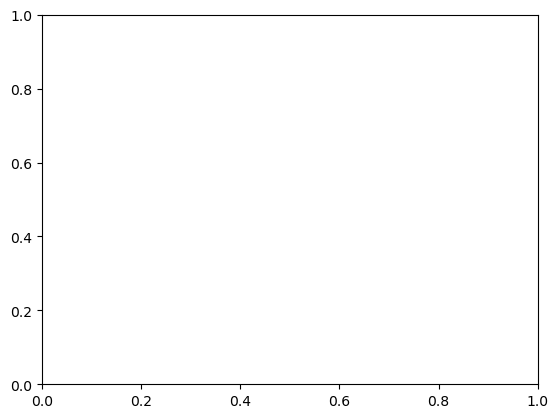

In [59]:

# Independent variable (generations)
x = np.array([1, 2, 3])

# Function to fit 2nd degree polynomial and find the minimum point
def fit_and_find_min(row):

    # Fit a 2nd-degree polynomial to the row (y-values)
    row = row[[1, 2, 3]]
    print(row)
    coefficients = np.polyfit(x, row, 2)
    print(coefficients)
    poly_eqn = np.poly1d(coefficients)

    # Generate fine-grained points to plot and find the minimum
    x_fine = np.linspace(1, 3, 100)  # Generate 100 points between generation 1 and 3
    y_fine = poly_eqn(x_fine)

    # Find the minimum point
    min_index = np.argmin(y_fine)
    min_x = x_fine[min_index]  # Generation (x) at minimum point
    min_y = y_fine[min_index]  # Population size (y) at minimum point

    return min_x, min_y, x_fine, y_fine

# Loop through each row in the DataFrame, fit polynomial, and visualize
for idx, row in df.iterrows():
    # Fit polynomial and find the minimum point
    min_x, min_y, x_fine, y_fine = fit_and_find_min(row)

    # Plot original data points
    plt.scatter(x, row, color='red', label='Data Points')

    # Plot the fitted polynomial curve
    plt.plot(x_fine, y_fine, label='2nd Degree Polynomial Fit')

    # Highlight the minimum point
    plt.scatter(min_x, min_y, color='blue', label='Minimum Point', zorder=5)

    # Add labels and title
    plt.title(f'Sample {idx+1}: Fitted Polynomial and Minimum Point')
    plt.xlabel('Generation')
    plt.ylabel('Population Size')
    plt.legend()

    # Show the plot for the current sample
    plt.show()

    # Output the minimum point for each row (for reference)
    print(f'Sample {idx+1} - Minimum Point: Generation = {min_x:.2f}, Population Size = {min_y:.2f}')



In [4]:
pop_pivot[0] = 15000

In [5]:
pop_pivot.to_csv('pop_dynamics.csv'v)

generation          1          2           3      0
site_plot                                          
10_1        20.022046  76.024195         NaN  15000
10_10       27.816165        NaN   94.001247  15000
10_11       22.539866        NaN         NaN  15000
10_12       14.278739        NaN         NaN  15000
10_2        22.539866  53.751287  107.929843  15000
...               ...        ...         ...    ...
9_5         78.333333   7.868034    8.548902  15000
9_6         86.333333   9.158410   10.811135  15000
9_7         87.666667   5.366662   67.658663  15000
9_8         51.000000   7.868034   10.811135  15000
9_9         97.000000   5.366662    8.019221  15000

[395 rows x 4 columns]

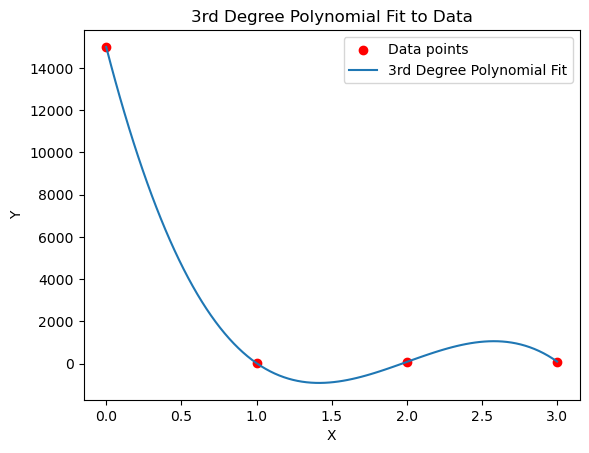

Polynomial coefficients: [ -2512.33333333  15055.         -27522.66666667  15000.        ]


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y)
x = np.array([0, 1, 2, 3])  # independent variable (you can choose this as you prefer)
y = np.array([15000, 20, 76, 94])  # dependent variable (your data)

# Fit a 3rd degree polynomial
coefficients = np.polyfit(x, y, 3)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('3rd Degree Polynomial Fit to Data')
plt.show()

print("Polynomial coefficients:", coefficients)


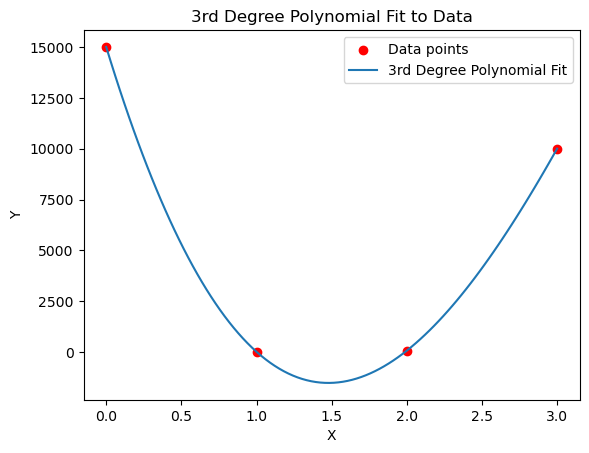

Polynomial coefficients: [  -861.33333333  10102.         -24220.66666667  15000.        ]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y)
x = np.array([0, 1, 2, 3])  # independent variable (you can choose this as you prefer)
y = np.array([15000, 20, 76, 10000])  # dependent variable (your data)

# Fit a 3rd degree polynomial
coefficients = np.polyfit(x, y, 3)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('3rd Degree Polynomial Fit to Data')
plt.show()

print("Polynomial coefficients:", coefficients)

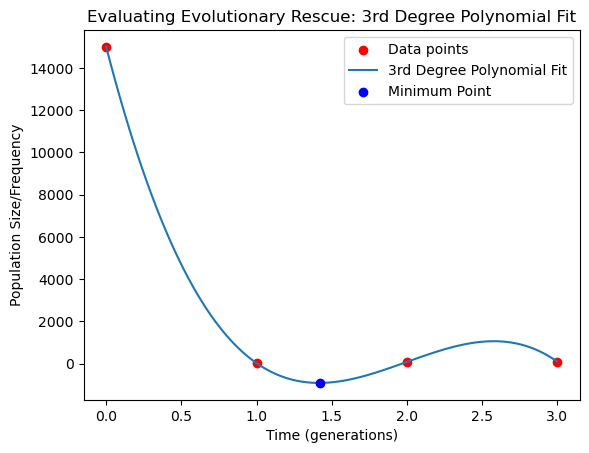

Polynomial coefficients: [ -2512.33333333  15055.         -27522.66666667  15000.        ]
Minimum point occurs at x = 1.4242424242424243, y = -918.5879919489016


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual population data)
# x represents the time or generation, y represents the population size/frequency
x = np.array([0, 1, 2, 3])  # independent variable (e.g., time points)
y = np.array([15000, 20, 76, 94])  # dependent variable (population size/frequency)

# Fit a 3rd-degree polynomial
coefficients = np.polyfit(x, y, 3)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Identify the minimum point in the fitted polynomial
min_index = np.argmin(y_curve)  # Find the index of the minimum value in y_curve
min_x = x_curve[min_index]  # x value at the minimum point
min_y = y_curve[min_index]  # y value at the minimum point

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')

# Highlight the minimum point
plt.scatter(min_x, min_y, color='blue', label='Minimum Point', zorder=5)

# Add labels and title
plt.xlabel('Time (generations)')
plt.ylabel('Population Size/Frequency')
plt.legend()
plt.title('Evaluating Evolutionary Rescue: 3rd Degree Polynomial Fit')

# Show plot
plt.show()

# Output the polynomial coefficients and the minimum point
print("Polynomial coefficients:", coefficients)
print(f"Minimum point occurs at x = {min_x}, y = {min_y}")


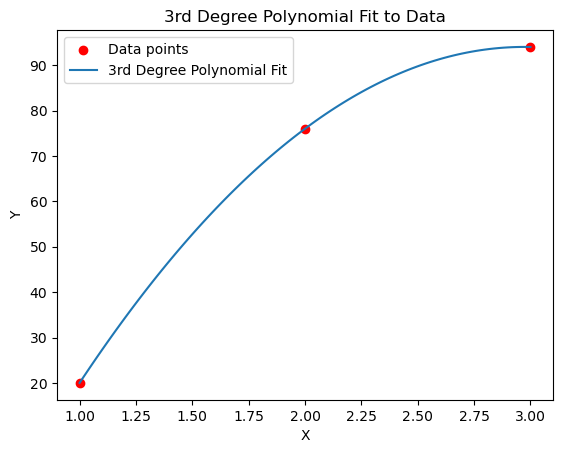

Polynomial coefficients: [-19. 113. -74.]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y)
x = np.array([1, 2, 3])  # independent variable (you can choose this as you prefer)
y = np.array([20, 76, 94])  # dependent variable (your data)

# Fit a 3rd degree polynomial
coefficients = np.polyfit(x, y, 2)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('3rd Degree Polynomial Fit to Data')
plt.show()

print("Polynomial coefficients:", coefficients)

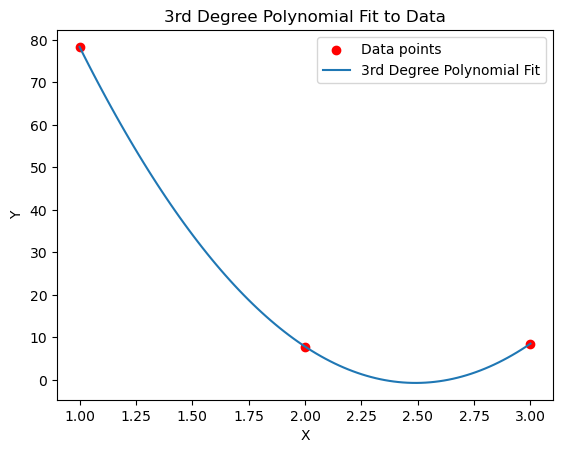

Polynomial coefficients: [  35.5730835 -177.1845495  219.944799 ]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y)
x = np.array([1, 2, 3])  # independent variable (you can choose this as you prefer)
y = np.array([78.333333,	7.868034,	8.548902])  # dependent variable (your data)

# Fit a 3rd degree polynomial
coefficients = np.polyfit(x, y, 2)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('3rd Degree Polynomial Fit to Data')
plt.show()

print("Polynomial coefficients:", coefficients)

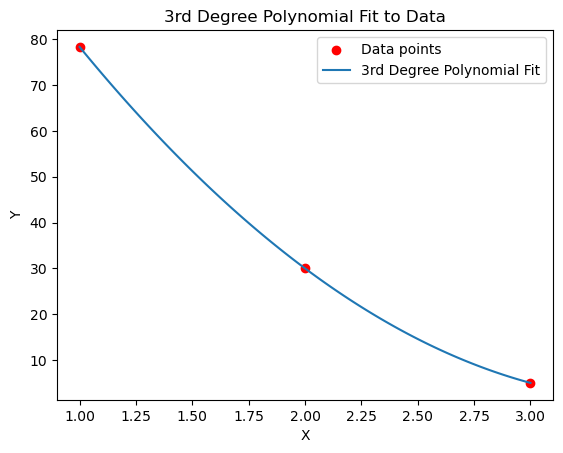

Polynomial coefficients: [ 11.6666665 -83.3333325 149.999999 ]


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Data points (x, y)
x = np.array([1, 2, 3])  # independent variable (you can choose this as you prefer)
y = np.array([78.333333,	30,	5])  # dependent variable (your data)

# Fit a 3rd degree polynomial
coefficients = np.polyfit(x, y, 2)
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Plotting the original data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('3rd Degree Polynomial Fit to Data')
plt.show()

print("Polynomial coefficients:", coefficients)

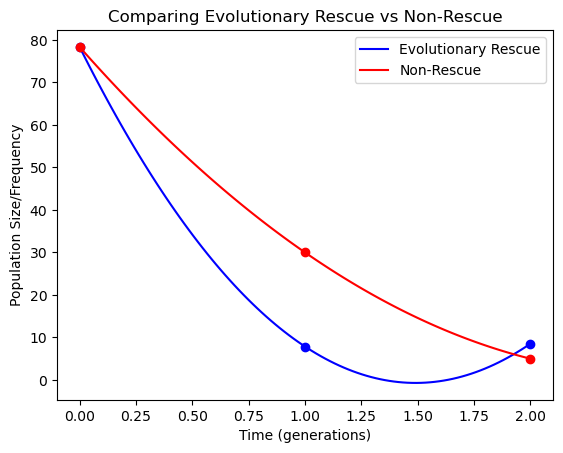

Evolutionary Rescue Polynomial coefficients: [  35.5730835 -106.0383825   78.333333 ]
Non-Rescue Polynomial coefficients: [ 11.6666665 -59.9999995  78.333333 ]


In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with actual cases)
x = np.array([0, 1, 2])  # independent variable (e.g., time points)

# Two different cases: one with evolutionary rescue, one without
y_rescue = np.array([78.333333, 7.868034, 8.548902])  # evolutionary rescue case
y_non_rescue = np.array([78.333333, 30, 5])  # non-rescue case

# Fit a second-degree polynomial (since we have 3 points)
coefficients_rescue = np.polyfit(x, y_rescue, 2)
coefficients_non_rescue = np.polyfit(x, y_non_rescue, 2)

poly_eqn_rescue = np.poly1d(coefficients_rescue)
poly_eqn_non_rescue = np.poly1d(coefficients_non_rescue)

# Generate points to plot the polynomial curves
x_curve = np.linspace(min(x), max(x), 100)
y_curve_rescue = poly_eqn_rescue(x_curve)
y_curve_non_rescue = poly_eqn_non_rescue(x_curve)

# Plot the two cases for comparison
plt.plot(x_curve, y_curve_rescue, label='Evolutionary Rescue', color='blue')
plt.scatter(x, y_rescue, color='blue', zorder=5)
plt.plot(x_curve, y_curve_non_rescue, label='Non-Rescue', color='red')
plt.scatter(x, y_non_rescue, color='red', zorder=5)

# Add labels and title
plt.xlabel('Time (generations)')
plt.ylabel('Population Size/Frequency')
plt.legend()
plt.title('Comparing Evolutionary Rescue vs Non-Rescue')
plt.show()

# Output polynomial coefficients for each case
print("Evolutionary Rescue Polynomial coefficients:", coefficients_rescue)
print("Non-Rescue Polynomial coefficients:", coefficients_non_rescue)


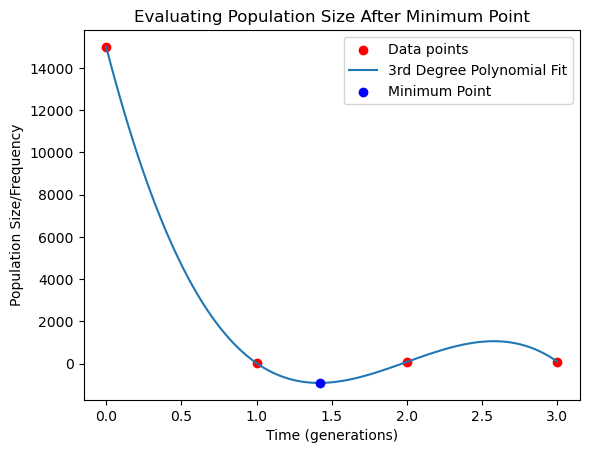

Polynomial coefficients: [ -2512.33333333  15055.         -27522.66666667  15000.        ]
Minimum point occurs at x = 1.4242424242424243, y = -918.5879919489016
Is there an increase after the minimum point? False


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with actual population data)
x = np.array([0, 1, 2, 3])  # Independent variable (e.g., time points)
y = np.array([15000, 20, 76, 94])  # Population size/frequency

# Fit a polynomial to the data (3rd-degree if needed)
coefficients = np.polyfit(x, y, 3)  # Change 3 to 2 for a quadratic fit if needed
poly_eqn = np.poly1d(coefficients)

# Generate points to plot the polynomial curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly_eqn(x_curve)

# Identify the minimum point in the fitted polynomial
min_index = np.argmin(y_curve)  # Find the index of the minimum value in y_curve
min_x = x_curve[min_index]  # x value at the minimum point
min_y = y_curve[min_index]  # y value at the minimum point

# Check for increase after the minimum point
# Find the population size after the minimum
y_after_min = y_curve[min_index:]

# Check if there is an increase after the minimum
is_increase_after_min = np.all(np.diff(y_after_min) > 0)

# Plotting the data and the polynomial fit
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x_curve, y_curve, label='3rd Degree Polynomial Fit')

# Highlight the minimum point
plt.scatter(min_x, min_y, color='blue', label='Minimum Point', zorder=5)

# Add labels and title
plt.xlabel('Time (generations)')
plt.ylabel('Population Size/Frequency')
plt.legend()
plt.title('Evaluating Population Size After Minimum Point')

# Show plot
plt.show()

# Output the polynomial coefficients, minimum point, and whether there's an increase after minimum
print("Polynomial coefficients:", coefficients)
print(f"Minimum point occurs at x = {min_x}, y = {min_y}")
print("Is there an increase after the minimum point?", is_increase_after_min)
